# Unsupervised Learning 
## Assignment 3

Rishabh Kaushick <br>
NUID: 002808996 <br>
kaushick.r@northeastern.edu <br> <br>
November 16, 2023

In [2]:
# library imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd

In [3]:
# importing both datasets into a pandas dataframe object
neo_csv_path = 'data/neo_data.csv'
heart_risk_csv_path = 'data/heart_attack_prediction_dataset.csv'

neo_df = pd.read_csv(neo_csv_path)
heart_risk_raw_df = pd.read_csv(heart_risk_csv_path)

In [4]:
neo_df.head()

,ID,Neo Reference ID,Name,Limited Name,Designation,NASA JPL URL,Absolute Magnitude (H),Min Diameter (km),Max Diameter (km),Min Diameter (m),...,Close Approach Date (Full),Epoch Date Close Approach,Relative Velocity (km/s),Relative Velocity (km/h),Relative Velocity (miles/h),Miss Distance (astronomical),Miss Distance (lunar),Miss Distance (km),Miss Distance (miles),Orbiting Body
0,2000433,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.41,22.006703,49.208483,22006.702711,...,1900-Dec-27 01:30,-2177879400000,5.578619,20083.029075,12478.813260,0.314929,122.507447,4.711273e+07,2.927449e+07,Earth
1,2000433,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.41,22.006703,49.208483,22006.702711,...,1907-Nov-05 03:31,-1961526540000,4.394491,15820.167199,9830.036668,0.471486,183.407876,7.053323e+07,4.382732e+07,Earth
2,2000433,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.41,22.006703,49.208483,22006.702711,...,1917-Apr-20 21:19,-1663036860000,4.816784,17340.422466,10774.664171,0.499257,194.211053,7.468781e+07,4.640886e+07,Earth
3,2000433,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.41,22.006703,49.208483,22006.702711,...,1924-Mar-05 22:13,-1446083220000,4.596055,16545.797588,10280.915173,0.359786,139.956944,5.382329e+07,3.344424e+07,Earth
4,2000433,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.41,22.006703,49.208483,22006.702711,...,1931-Jan-30 04:07,-1228247580000,5.920819,21314.946723,13244.278979,0.174073,67.714454,2.604097e+07,1.618111e+07,Earth


In [5]:
neo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            904 non-null    int64  
 1   Neo Reference ID              904 non-null    int64  
 2   Name                          904 non-null    object 
 3   Limited Name                  904 non-null    object 
 4   Designation                   904 non-null    int64  
 5   NASA JPL URL                  904 non-null    object 
 6   Absolute Magnitude (H)        904 non-null    float64
 7   Min Diameter (km)             904 non-null    float64
 8   Max Diameter (km)             904 non-null    float64
 9   Min Diameter (m)              904 non-null    float64
 10  Max Diameter (m)              904 non-null    float64
 11  Min Diameter (miles)          904 non-null    float64
 12  Max Diameter (miles)          904 non-null    float64
 13  Min D

# Additional Exploratory Data Analysis

array([[<Axes: title={'center': 'Min Diameter (km)'}>,
        <Axes: title={'center': 'Max Diameter (km)'}>,
        <Axes: title={'center': 'Max Diameter (m)'}>],
       [<Axes: title={'center': 'Min Diameter (m)'}>,
        <Axes: title={'center': 'Min Diameter (miles)'}>,
        <Axes: title={'center': 'Max Diameter (miles)'}>],
       [<Axes: title={'center': 'Min Diameter (feet)'}>,
        <Axes: title={'center': 'Max Diameter (feet)'}>, <Axes: >]],
      dtype=object)

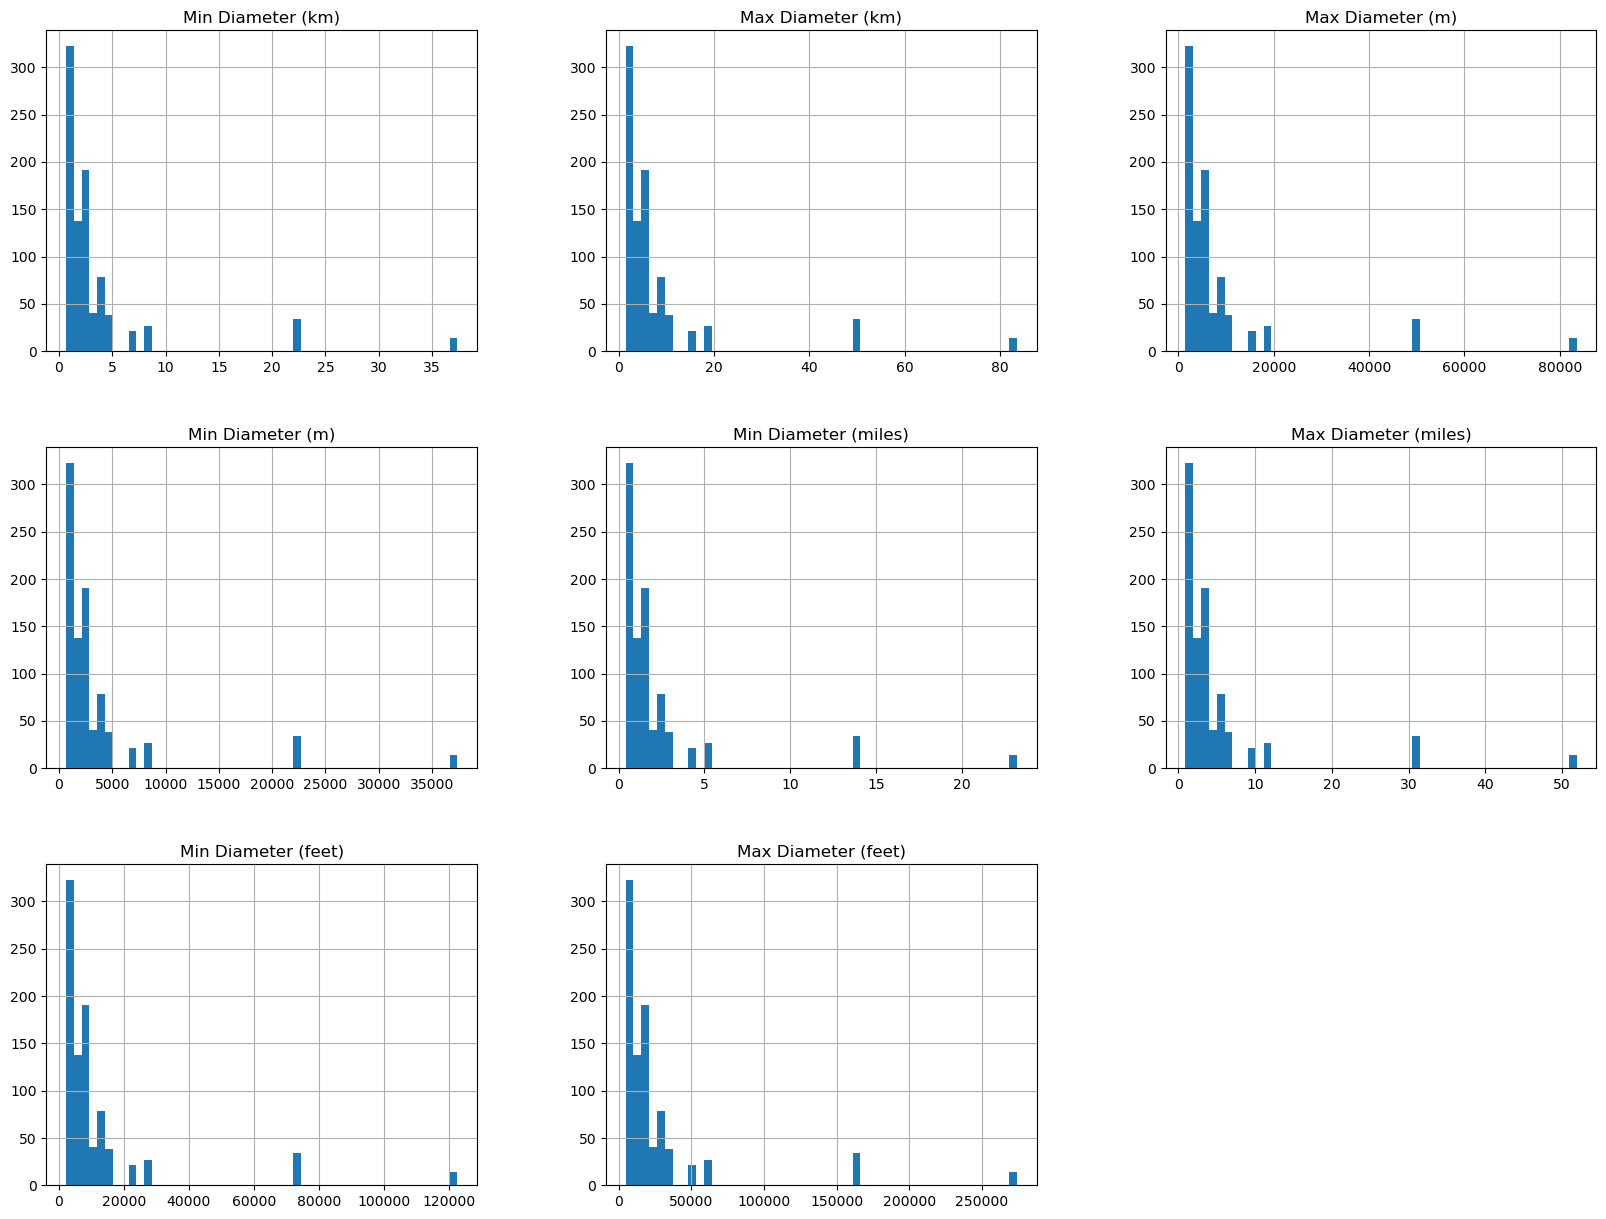

In [6]:
neo_df.hist(column=["Min Diameter (km)", "Max Diameter (km)", "Max Diameter (m)", "Min Diameter (m)", "Min Diameter (miles)", "Max Diameter (miles)", "Min Diameter (feet)", "Max Diameter (feet)"], bins=50, figsize=(20,15))

In [7]:
neo_df['Min Diameter (miles)'].describe()

count    904.000000
mean       2.280249
std        3.643036
min        0.405421
25%        0.794156
50%        1.258653
75%        2.177238
max       23.222339
Name: Min Diameter (miles), dtype: float64

In [8]:
neo_df['Min Diameter (feet)'].describe()

count       904.000000
mean      12039.717721
std       19235.235316
min        2140.622213
25%        4193.146421
50%        6645.689217
75%       11495.821927
max      122613.990772
Name: Min Diameter (feet), dtype: float64

array([[<Axes: title={'center': 'Relative Velocity (km/s)'}>,
        <Axes: title={'center': 'Relative Velocity (km/h)'}>],
       [<Axes: title={'center': 'Relative Velocity (miles/h)'}>,
        <Axes: >]], dtype=object)

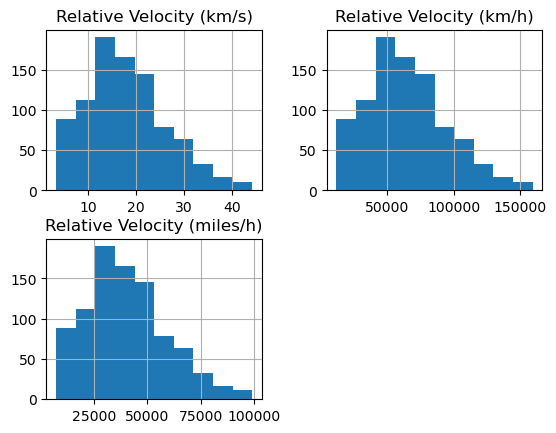

In [9]:
neo_df.hist(column=["Relative Velocity (km/s)", "Relative Velocity (km/h)", "Relative Velocity (miles/h)"])

In [10]:
# normalizing values in the features - Min Diameter, Max Diameter & Relative Velocity
from sklearn import preprocessing
normalized_min_diameter = preprocessing.normalize([neo_df['Min Diameter (miles)']])

In [11]:
neo_df['Min Diameter (miles)']

0      13.674327
1      13.674327
2      13.674327
3      13.674327
4      13.674327
         ...    
899     2.779111
900     2.779111
901     2.779111
902     2.779111
903     2.779111
Name: Min Diameter (miles), Length: 904, dtype: float64

In [12]:
normalized_min_diameter

array([[0.10586352, 0.10586352, 0.10586352, 0.10586352, 0.10586352,
        0.10586352, 0.10586352, 0.10586352, 0.10586352, 0.10586352,
        0.10586352, 0.10586352, 0.10586352, 0.10586352, 0.10586352,
        0.10586352, 0.10586352, 0.10586352, 0.10586352, 0.10586352,
        0.10586352, 0.10586352, 0.10586352, 0.10586352, 0.10586352,
        0.10586352, 0.10586352, 0.10586352, 0.10586352, 0.10586352,
        0.10586352, 0.10586352, 0.10586352, 0.10586352, 0.0097442 ,
        0.0097442 , 0.0097442 , 0.0097442 , 0.0097442 , 0.0097442 ,
        0.0097442 , 0.0097442 , 0.0097442 , 0.0097442 , 0.0097442 ,
        0.0097442 , 0.0097442 , 0.0097442 , 0.0097442 , 0.0097442 ,
        0.0097442 , 0.02141639, 0.02141639, 0.02141639, 0.02141639,
        0.02141639, 0.02141639, 0.02141639, 0.02141639, 0.02141639,
        0.02141639, 0.02141639, 0.02141639, 0.02141639, 0.02141639,
        0.17978205, 0.17978205, 0.17978205, 0.17978205, 0.17978205,
        0.17978205, 0.17978205, 0.17978205, 0.17

Through the above code, we can see that we can convert any column into a normalized value. However instead of just converting the minimum diameter to thhe smallest value, in the future we will normalize all the values.

array([[<Axes: title={'center': 'Miss Distance (astronomical)'}>,
        <Axes: title={'center': 'Miss Distance (lunar)'}>],
       [<Axes: title={'center': 'Miss Distance (km)'}>,
        <Axes: title={'center': 'Miss Distance (miles)'}>]], dtype=object)

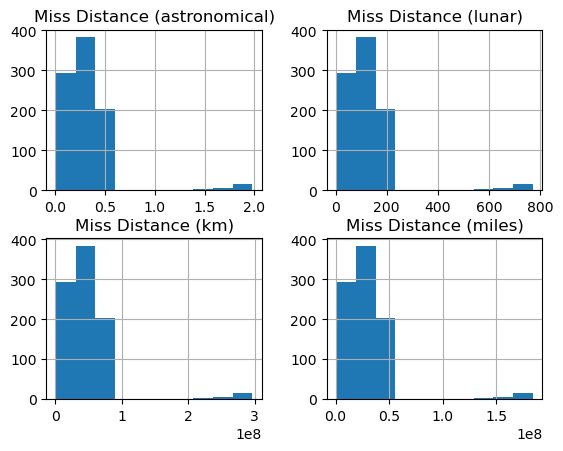

In [13]:
neo_df.hist(column=["Miss Distance (astronomical)", "Miss Distance (lunar)", "Miss Distance (km)", "Miss Distance (miles)"])

Orbiting Body feature:

In [14]:
neo_df['Orbiting Body'].value_counts()

Orbiting Body
Earth    787
Venus     66
Juptr     25
Mars      17
Merc       9
Name: count, dtype: int64

## Preparing the Data for the ML Models

In [15]:
# removing all the columns which are not needed

### Handling Null Values

In [16]:
# find if there are any missing null values
neo_df.isna().sum()

ID                              0
Neo Reference ID                0
Name                            0
Limited Name                    0
Designation                     0
NASA JPL URL                    0
Absolute Magnitude (H)          0
Min Diameter (km)               0
Max Diameter (km)               0
Min Diameter (m)                0
Max Diameter (m)                0
Min Diameter (miles)            0
Max Diameter (miles)            0
Min Diameter (feet)             0
Max Diameter (feet)             0
Is Potentially Hazardous        0
Close Approach Date             0
Close Approach Date (Full)      0
Epoch Date Close Approach       0
Relative Velocity (km/s)        0
Relative Velocity (km/h)        0
Relative Velocity (miles/h)     0
Miss Distance (astronomical)    0
Miss Distance (lunar)           0
Miss Distance (km)              0
Miss Distance (miles)           0
Orbiting Body                   0
dtype: int64

There are no null values in this dataset.

### Handling Catagorical Data
Orbit Body

In [17]:
from sklearn.preprocessing import LabelEncoder

# first getting the label encoding
label_encoder = LabelEncoder()
orbit_integer_encoded = label_encoder.fit_transform(neo_df['Orbiting Body'])
orbit_integer_encoded = orbit_integer_encoded.reshape(len(orbit_integer_encoded), 1)
# above we are reshaoing the array such that it forms a vector
orbit_integer_encoded

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [2],
       [1],
       [0],
       [0],
       [0],
       [2],
       [0],
       [0],
       [0],
       [0],
    

In [18]:
# now performing One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
orbit_body_one_hot_encoded = one_hot_encoder.fit_transform(orbit_integer_encoded)
orbit_body_one_hot_encoded

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [19]:
# Adding new features to the dataset
len(orbit_body_one_hot_encoded)

904

In [20]:
orbit_body_one_hot_encoded.shape

(904, 5)

Let us look at the categories of One Hot Encoding:

In [21]:
one_hot_encoder.categories_

[array([0, 1, 2, 3, 4])]

Above, we can see that the categories are 0, 1, 2, 3, 4. This is because we gave the label encoded result as input for the one hot encoding.

Let us further see which orbiting bodies denotes which of the above numbers:

In [22]:
label_encoder.classes_

array(['Earth', 'Juptr', 'Mars', 'Merc', 'Venus'], dtype=object)

The label encoder's categories are: <br>
['Earth', 'Juptr', 'Mars', 'Merc', 'Venus']

This means that:
- 0 : Earth
- 1 : Juptr
- 2 : Mars
- 3 : Merc
- 4 : Venus

In [23]:
# making sure that the shape is as needed
orbit_body_one_hot_encoded.reshape(len(orbit_body_one_hot_encoded), 5)

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [24]:
orbit_body_one_hot_encoded.shape


(904, 5)

We can see from the above cell that there are 904 rows and 5 columns.

Now we can add this one hot encoded result into the neo_df dataframe object.

In [25]:
neo_df[['Orbit Earth', 'Orbit Juptr', 'Orbit Mars', 'Orbit Merc', 'Orbit Venus']] = orbit_body_one_hot_encoded

In [26]:
neo_df

,ID,Neo Reference ID,Name,Limited Name,Designation,NASA JPL URL,Absolute Magnitude (H),Min Diameter (km),Max Diameter (km),Min Diameter (m),...,Miss Distance (astronomical),Miss Distance (lunar),Miss Distance (km),Miss Distance (miles),Orbiting Body,Orbit Earth,Orbit Juptr,Orbit Mars,Orbit Merc,Orbit Venus
0,2000433,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.41,22.006703,49.208483,22006.702711,...,0.314929,122.507447,4.711273e+07,2.927449e+07,Earth,1.0,0.0,0.0,0.0,0.0
1,2000433,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.41,22.006703,49.208483,22006.702711,...,0.471486,183.407876,7.053323e+07,4.382732e+07,Earth,1.0,0.0,0.0,0.0,0.0
2,2000433,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.41,22.006703,49.208483,22006.702711,...,0.499257,194.211053,7.468781e+07,4.640886e+07,Earth,1.0,0.0,0.0,0.0,0.0
3,2000433,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.41,22.006703,49.208483,22006.702711,...,0.359786,139.956944,5.382329e+07,3.344424e+07,Earth,1.0,0.0,0.0,0.0,0.0
4,2000433,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.41,22.006703,49.208483,22006.702711,...,0.174073,67.714454,2.604097e+07,1.618111e+07,Earth,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,2001980,2001980,1980 Tezcatlipoca (1950 LA),Tezcatlipoca,1980,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2001980,13.87,4.472548,10.000921,4472.547654,...,0.296957,115.516221,4.442411e+07,2.760386e+07,Earth,1.0,0.0,0.0,0.0,0.0
900,2001980,2001980,1980 Tezcatlipoca (1950 LA),Tezcatlipoca,1980,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2001980,13.87,4.472548,10.000921,4472.547654,...,0.302914,117.833548,4.531529e+07,2.815762e+07,Earth,1.0,0.0,0.0,0.0,0.0
901,2001980,2001980,1980 Tezcatlipoca (1950 LA),Tezcatlipoca,1980,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2001980,13.87,4.472548,10.000921,4472.547654,...,0.499515,194.311305,7.472637e+07,4.643281e+07,Earth,1.0,0.0,0.0,0.0,0.0
902,2001980,2001980,1980 Tezcatlipoca (1950 LA),Tezcatlipoca,1980,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2001980,13.87,4.472548,10.000921,4472.547654,...,0.302849,117.808322,4.530559e+07,2.815159e+07,Earth,1.0,0.0,0.0,0.0,0.0


In [27]:
neo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            904 non-null    int64  
 1   Neo Reference ID              904 non-null    int64  
 2   Name                          904 non-null    object 
 3   Limited Name                  904 non-null    object 
 4   Designation                   904 non-null    int64  
 5   NASA JPL URL                  904 non-null    object 
 6   Absolute Magnitude (H)        904 non-null    float64
 7   Min Diameter (km)             904 non-null    float64
 8   Max Diameter (km)             904 non-null    float64
 9   Min Diameter (m)              904 non-null    float64
 10  Max Diameter (m)              904 non-null    float64
 11  Min Diameter (miles)          904 non-null    float64
 12  Max Diameter (miles)          904 non-null    float64
 13  Min D

Now that we have the orbiting body as a one hot encoding, we can drop the Orbiting Body column

In [28]:
neo_df.drop(columns=["Orbiting Body"], inplace=True)

In [30]:
neo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            904 non-null    int64  
 1   Neo Reference ID              904 non-null    int64  
 2   Name                          904 non-null    object 
 3   Limited Name                  904 non-null    object 
 4   Designation                   904 non-null    int64  
 5   NASA JPL URL                  904 non-null    object 
 6   Absolute Magnitude (H)        904 non-null    float64
 7   Min Diameter (km)             904 non-null    float64
 8   Max Diameter (km)             904 non-null    float64
 9   Min Diameter (m)              904 non-null    float64
 10  Max Diameter (m)              904 non-null    float64
 11  Min Diameter (miles)          904 non-null    float64
 12  Max Diameter (miles)          904 non-null    float64
 13  Min D

In [32]:
# change:
    # Name
    # Limited Name

In [31]:
# Name & Limited Name columns
# Let's sample some data from the Name column to see the type of data
neo_df[['Name', 'Limited Name']].sample(15)

,Name,Limited Name
372,1685 Toro (1948 OA),Toro
380,1685 Toro (1948 OA),Toro
571,1864 Daedalus (1971 FA),Daedalus
621,1865 Cerberus (1971 UA),Cerberus
89,1221 Amor (1932 EA1),Amor
820,1916 Boreas (1953 RA),Boreas
310,1620 Geographos (1951 RA),Geographos
222,1566 Icarus (1949 MA),Icarus
20,433 Eros (A898 PA),Eros
692,1865 Cerberus (1971 UA),Cerberus


It looks like there are a few names which are repeating multiple times. Let's see how many such values are present

In [34]:
neo_df['Limited Name'].value_counts()

Limited Name
Cerberus        150
Icarus          115
Apollo           84
Daedalus         81
Toro             78
Geographos       76
Anteros          37
Eros             34
Amor             29
Quetzalcoatl     29
Sisyphus         27
Betulia          25
Tezcatlipoca     24
Antinous         22
Ivar             21
Albert           17
Cuyo             15
Ganymed          14
Alinda           14
Boreas           12
Name: count, dtype: int64

There are a total of 20 categories of data in the Limited Name column. <br>
If we want to convert this data - it will not be wise to use a One Hot Encoding as that will increase the model complexity tenfold.

In [38]:
# Checking if the id corresponds to the name columns
neo_df[['ID', 'Name', 'Limited Name']].sample(15)

,ID,Name,Limited Name
339,2001627,1627 Ivar (1929 SH),Ivar
189,2001566,1566 Icarus (1949 MA),Icarus
456,2001862,1862 Apollo (1932 HA),Apollo
219,2001566,1566 Icarus (1949 MA),Icarus
680,2001865,1865 Cerberus (1971 UA),Cerberus
277,2001620,1620 Geographos (1951 RA),Geographos
504,2001862,1862 Apollo (1932 HA),Apollo
854,2001943,1943 Anteros (1973 EC),Anteros
411,2001685,1685 Toro (1948 OA),Toro
580,2001864,1864 Daedalus (1971 FA),Daedalus


These above three columns are dependant on each other. <br>
For example, above we can see that the Limited Name – ‘Icarus’ will always have the Name as ‘1566 Icarus (1949 MA)’ and ID as ‘2001566’.
<br>
In this case, we can drop the Name and Limited Name columns.

In [39]:
# Checking the designation column
neo_df[['ID', 'Neo Reference ID', 'Limited Name', 'Designation']].sample(15)

,ID,Neo Reference ID,Limited Name,Designation
47,2000719,2000719,Albert,719
155,2001566,2001566,Icarus,1566
627,2001865,2001865,Cerberus,1865
216,2001566,2001566,Icarus,1566
244,2001580,2001580,Betulia,1580
527,2001863,2001863,Antinous,1863
764,2001866,2001866,Sisyphus,1866
767,2001866,2001866,Sisyphus,1866
452,2001862,2001862,Apollo,1862
649,2001865,2001865,Cerberus,1865


In [40]:
neo_df[['ID', 'Neo Reference ID', 'Designation']].corr()

,ID,Neo Reference ID,Designation
ID,1.0,1.0,1.0
Neo Reference ID,1.0,1.0,1.0
Designation,1.0,1.0,1.0


From the above data, we can see that:
1. the ID and the Neo Reference ID columns both have the same data
2. the designation column is just the last 4 digits of the ID column.

Therefore, we can remove the ID & Neo Reference ID column and keep just the Designation column.

Close Approach Date

In [38]:
neo_df[['Close Approach Date', 'Close Approach Date (Full)']].head()

,Close Approach Date,Close Approach Date (Full)
0,1900-12-27,1900-Dec-27 01:30
1,1907-11-05,1907-Nov-05 03:31
2,1917-04-20,1917-Apr-20 21:19
3,1924-03-05,1924-Mar-05 22:13
4,1931-01-30,1931-Jan-30 04:07


In [39]:
# using the pd.to_datetime function to convert above strings to date time
close_approach_date = pd.to_datetime(neo_df['Close Approach Date (Full)'], 
                                     format='%Y-%b-%d %H:%M',
                                     errors='coerce')

# errors coerce - will return an out-of-bounds date (NaT)
    # then we can deal with those seperately

close_approach_date

0     1900-12-27 01:30:00
1     1907-11-05 03:31:00
2     1917-04-20 21:19:00
3     1924-03-05 22:13:00
4     1931-01-30 04:07:00
              ...        
899   2149-11-18 03:26:00
900   2158-11-17 21:28:00
901   2187-07-08 20:39:00
902   2187-11-18 21:15:00
903   2196-11-17 06:40:00
Name: Close Approach Date (Full), Length: 904, dtype: datetime64[ns]

In [40]:
# creating a new column called 'Close Approach Date (datetime)'
neo_df['Close Approach Date (datetime)'] = close_approach_date

Now we can drop the Close Approach Date & Close Approach Date (Full) columns.

However, the above approach did not work. The KMeans clustering algorithm can only work with data which is in int or float formats. <br>
Hence we will consider the column - Epoch Date Close Approach and we will drop the other two columns - Close Approach Date & Close Approach Date (Full)


In [41]:
neo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            904 non-null    int64  
 1   Neo Reference ID              904 non-null    int64  
 2   Name                          904 non-null    object 
 3   Limited Name                  904 non-null    object 
 4   Designation                   904 non-null    int64  
 5   NASA JPL URL                  904 non-null    object 
 6   Absolute Magnitude (H)        904 non-null    float64
 7   Min Diameter (km)             904 non-null    float64
 8   Max Diameter (km)             904 non-null    float64
 9   Min Diameter (m)              904 non-null    float64
 10  Max Diameter (m)              904 non-null    float64
 11  Min Diameter (miles)          904 non-null    float64
 12  Max Diameter (miles)          904 non-null    float64
 13  Min D

In [43]:
neo_df['Absolute Magnitude (H)'].describe()

count    904.000000
mean      15.329181
std        1.751760
min        9.260000
25%       14.400000
50%       15.590000
75%       16.590000
max       18.050000
Name: Absolute Magnitude (H), dtype: float64

### Removing Columns Which Are Not Required
Columns to drop from the dataset:
- Min Diameter (km)
- Max Diameter (km)
- Min Diameter (m)
- Max Diameter (m)
- Min Diameter (feet)
- Max Diameter (feet)
- Relative Velocity (km/h)
- Relative Velocity (miles/h)
- Miss Distance (lunar)
- Miss Distance (km)
- Miss Distance (miles)
- JPL URL 
- Name
- Limited Name
- ID
- Neo Reference ID
- Is Potentially Hazardous (Target variable for supervised learning task)
- Close Approach Date
- Close Approach Date (Full)

In [44]:
neo_df.drop(columns=['ID', 
                     'Neo Reference ID',
                     'Name', 
                     'Limited Name', 
                     'NASA JPL URL',
                     'Min Diameter (km)',
                     'Max Diameter (km)',
                     'Min Diameter (m)',
                     'Max Diameter (m)',
                     'Min Diameter (feet)',
                     'Max Diameter (feet)',
                     'Is Potentially Hazardous',
                     'Close Approach Date',
                     'Close Approach Date (Full)',
                     'Relative Velocity (km/h)',
                     'Relative Velocity (miles/h)',
                     'Miss Distance (lunar)',
                     'Miss Distance (km)',
                     'Miss Distance (miles)'],
                inplace=True)

In [45]:
# Now let's see the new data-frame object
neo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Designation                   904 non-null    int64  
 1   Absolute Magnitude (H)        904 non-null    float64
 2   Min Diameter (miles)          904 non-null    float64
 3   Max Diameter (miles)          904 non-null    float64
 4   Epoch Date Close Approach     904 non-null    int64  
 5   Relative Velocity (km/s)      904 non-null    float64
 6   Miss Distance (astronomical)  904 non-null    float64
 7   Orbit Earth                   904 non-null    float64
 8   Orbit Juptr                   904 non-null    float64
 9   Orbit Mars                    904 non-null    float64
 10  Orbit Merc                    904 non-null    float64
 11  Orbit Venus                   904 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 84.9 KB


In [46]:
# Let's find the correlation between all the fields
corr_matrix = neo_df.corr()
corr_matrix.style.background_gradient()

,Designation,Absolute Magnitude (H),Min Diameter (miles),Max Diameter (miles),Epoch Date Close Approach,Relative Velocity (km/s),Miss Distance (astronomical),Orbit Earth,Orbit Juptr,Orbit Mars,Orbit Merc,Orbit Venus
Designation,1.000000,0.495540,-0.604571,-0.604571,0.031315,0.270055,-0.107703,0.008650,-0.151902,0.002290,-0.027549,0.093906
Absolute Magnitude (H),0.495540,1.000000,-0.852578,-0.852578,0.008876,0.228146,-0.068325,-0.138415,0.006976,0.007181,0.072215,0.142890
Min Diameter (miles),-0.604571,-0.852578,1.000000,1.000000,-0.016042,-0.242810,0.121466,0.034679,0.069299,0.050279,-0.040929,-0.099061
Max Diameter (miles),-0.604571,-0.852578,1.000000,1.000000,-0.016042,-0.242810,0.121466,0.034679,0.069299,0.050279,-0.040929,-0.099061
Epoch Date Close Approach,0.031315,0.008876,-0.016042,-0.016042,1.000000,0.042882,-0.004912,-0.010047,-0.013921,0.002828,-0.015723,0.026262
Relative Velocity (km/s),0.270055,0.228146,-0.242810,-0.242810,0.042882,1.000000,-0.130966,-0.057351,-0.212659,-0.017885,0.253031,0.120821
Miss Distance (astronomical),-0.107703,-0.068325,0.121466,0.121466,-0.004912,-0.130966,1.000000,-0.186815,0.879698,-0.125250,-0.081380,-0.217003
Orbit Earth,0.008650,-0.138415,0.034679,0.034679,-0.010047,-0.057351,-0.186815,1.000000,-0.437391,-0.359052,-0.260078,-0.727854
Orbit Juptr,-0.151902,0.006976,0.069299,0.069299,-0.013921,-0.212659,0.879698,-0.437391,1.000000,-0.023347,-0.016912,-0.047329
Orbit Mars,0.002290,0.007181,0.050279,0.050279,0.002828,-0.017885,-0.125250,-0.359052,-0.023347,1.000000,-0.013883,-0.038852


### Designation vs Absolute Magnitude

<Axes: xlabel='Designation', ylabel='Absolute Magnitude'>

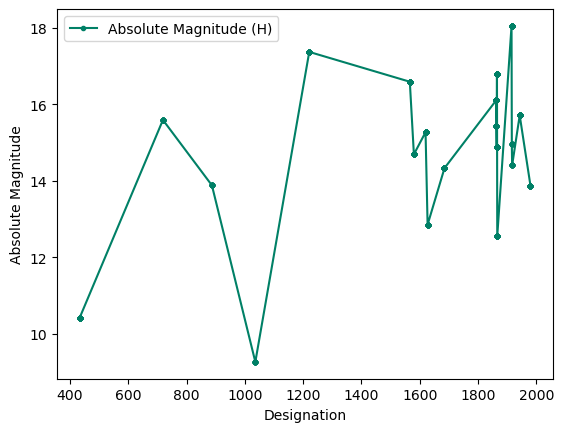

In [47]:
neo_df.plot(kind="line", x="Designation", y="Absolute Magnitude (H)", xlabel="Designation", ylabel="Absolute Magnitude", style=".-", colormap=plt.get_cmap("summer"))

### Miss Distance vs Orbit Jupiter

<Axes: xlabel='Orbiting Jupiter', ylabel='Miss Distance (astronomical)'>

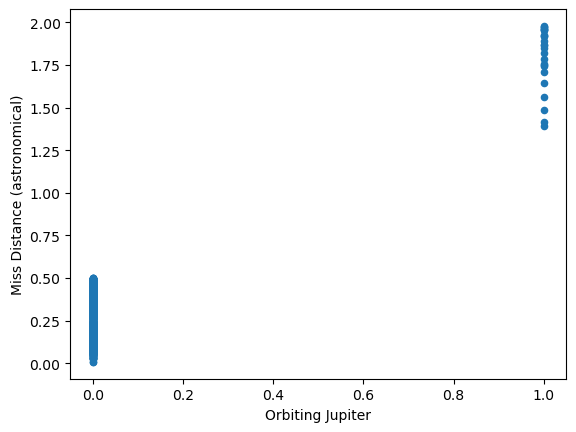

In [50]:
# Miss distance & Orbit Juptr (Since they have a high correlation)
# plotting a graph

neo_df.plot(kind="scatter", x="Orbit Juptr", y="Miss Distance (astronomical)", xlabel="Orbiting Jupiter")

In [51]:
neo_df['Orbit Juptr'].value_counts()

Orbit Juptr
0.0    879
1.0     25
Name: count, dtype: int64

<Axes: xlabel='Minimum Diameter', ylabel='Maximum Diameter'>

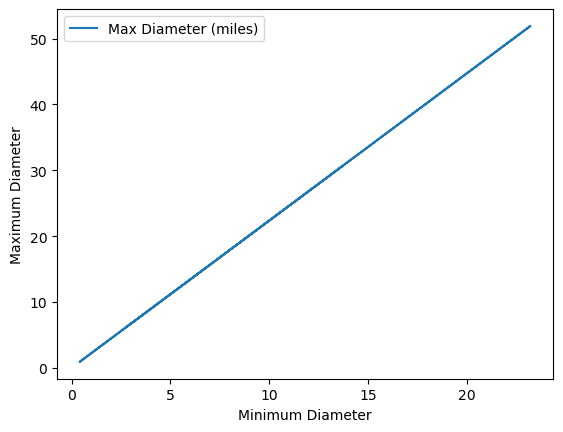

In [52]:
# plotting the minimum and maximum diameter
neo_df.plot(kind="line", x='Min Diameter (miles)', y='Max Diameter (miles)', xlabel="Minimum Diameter", ylabel="Maximum Diameter")

We can see that the min and max diameter points are forming a straight line thereby confirming that they are directly correlated.

### Feature Engineering
Creting a new feature called Average Diameter. This feeature will be an average between the minimum and the maximum diameter.

In [53]:
neo_df['Average Diameter (miles)'] = (neo_df['Max Diameter (miles)']+neo_df['Min Diameter (miles)'])/2

In [54]:
neo_df[['Max Diameter (miles)', 'Min Diameter (miles)', 'Average Diameter (miles)']].head()

,Max Diameter (miles),Min Diameter (miles),Average Diameter (miles)
0,30.576724,13.674327,22.125526
1,30.576724,13.674327,22.125526
2,30.576724,13.674327,22.125526
3,30.576724,13.674327,22.125526
4,30.576724,13.674327,22.125526


In [55]:
# now dropping the min and max diameters
neo_df.drop(columns=['Max Diameter (miles)', 'Min Diameter (miles)'], inplace=True)
neo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Designation                   904 non-null    int64  
 1   Absolute Magnitude (H)        904 non-null    float64
 2   Epoch Date Close Approach     904 non-null    int64  
 3   Relative Velocity (km/s)      904 non-null    float64
 4   Miss Distance (astronomical)  904 non-null    float64
 5   Orbit Earth                   904 non-null    float64
 6   Orbit Juptr                   904 non-null    float64
 7   Orbit Mars                    904 non-null    float64
 8   Orbit Merc                    904 non-null    float64
 9   Orbit Venus                   904 non-null    float64
 10  Average Diameter (miles)      904 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 77.8 KB


## Feature Scaling
Scaling the features of all the columns except the folling:
- Orbit Earth
- Orbit Juptr
- Orbit Mars
- Orbit Merc 
- Orbit Venus 

Reason being these columns are columns with binary data, and do not require feature scaling.

In [56]:
# Normalize all the features
from sklearn import preprocessing
min_max_scalar = preprocessing.MinMaxScaler()
neo_scaled = min_max_scalar.fit_transform(neo_df.drop(columns=['Orbit Earth', 
                                                                'Orbit Juptr', 
                                                                'Orbit Mars', 
                                                                'Orbit Merc', 
                                                                'Orbit Venus']))
neo_df_scaled = pd.DataFrame(neo_scaled)
neo_df_scaled.head()

,0,1,2,3,4,5
0,0.0,0.13083,0.002668,0.056507,0.155560,0.581538
1,0.0,0.13083,0.025467,0.027606,0.234985,0.581538
2,0.0,0.13083,0.056921,0.037913,0.249075,0.581538
3,0.0,0.13083,0.079782,0.032525,0.178317,0.581538
4,0.0,0.13083,0.102737,0.064860,0.084099,0.581538


It seems that the Min Max Scalar has changed the column title values. For being intuitive, let us rename the columns back to their original values.

In [57]:
neo_df_scaled = neo_df_scaled.rename(columns={0: 'Designation',
                                1: 'Absolute Magnitude (H)',
                                2: 'Epoch Date Close Approach',
                                3: 'Relative Velocity (km/s)',
                                4: 'Miss Distance (astronomical)',
                                5: 'Average Diameter (miles)'},
                    errors='raise')

In [58]:
neo_df_scaled.head()

,Designation,Absolute Magnitude (H),Epoch Date Close Approach,Relative Velocity (km/s),Miss Distance (astronomical),Average Diameter (miles)
0,0.0,0.13083,0.002668,0.056507,0.155560,0.581538
1,0.0,0.13083,0.025467,0.027606,0.234985,0.581538
2,0.0,0.13083,0.056921,0.037913,0.249075,0.581538
3,0.0,0.13083,0.079782,0.032525,0.178317,0.581538
4,0.0,0.13083,0.102737,0.064860,0.084099,0.581538


In [59]:
neo_df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Designation                   904 non-null    float64
 1   Absolute Magnitude (H)        904 non-null    float64
 2   Epoch Date Close Approach     904 non-null    float64
 3   Relative Velocity (km/s)      904 non-null    float64
 4   Miss Distance (astronomical)  904 non-null    float64
 5   Average Diameter (miles)      904 non-null    float64
dtypes: float64(6)
memory usage: 42.5 KB


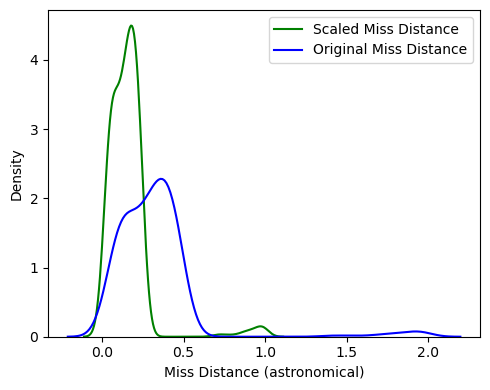

In [60]:
# viewing the normalized plot of the Miss Distance and comapring it with the previous graph before scaling.

plt.rcParams["figure.figsize"] = [5, 4]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots()

sns.kdeplot(neo_df_scaled['Miss Distance (astronomical)'], color="green", ax=axes, label='Scaled Miss Distance')
sns.kdeplot(neo_df['Miss Distance (astronomical)'], color="blue", ax=axes, label='Original Miss Distance')
axes.legend()
plt.tight_layout()

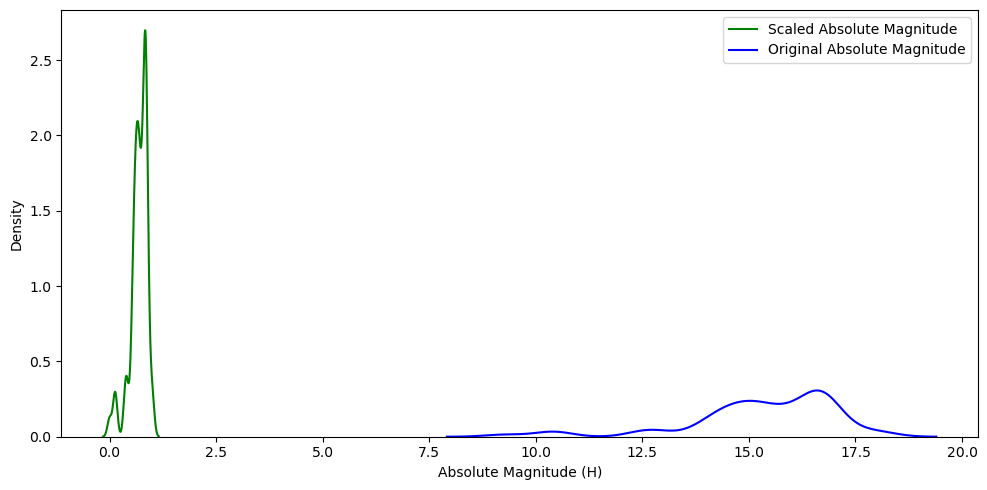

In [61]:
# similarly visualizing the other types of columns

plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots()

sns.kdeplot(neo_df_scaled['Absolute Magnitude (H)'], color="green", ax=axes, label='Scaled Absolute Magnitude')
sns.kdeplot(neo_df['Absolute Magnitude (H)'], color="blue", ax=axes, label='Original Absolute Magnitude')
axes.legend()
plt.tight_layout()

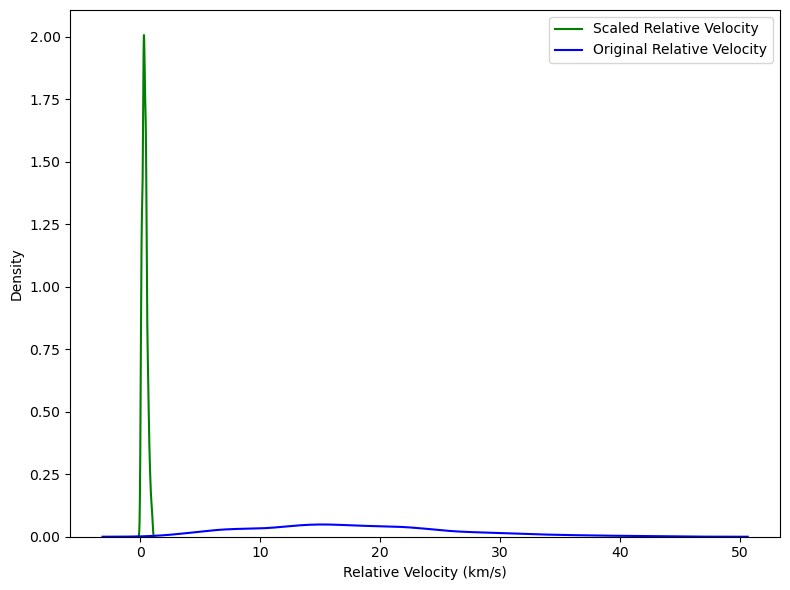

In [62]:
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots()

sns.kdeplot(neo_df_scaled['Relative Velocity (km/s)'], color="green", ax=axes, label='Scaled Relative Velocity')
sns.kdeplot(neo_df['Relative Velocity (km/s)'], color="blue", ax=axes, label='Original Relative Velocity')
axes.legend()
plt.tight_layout()

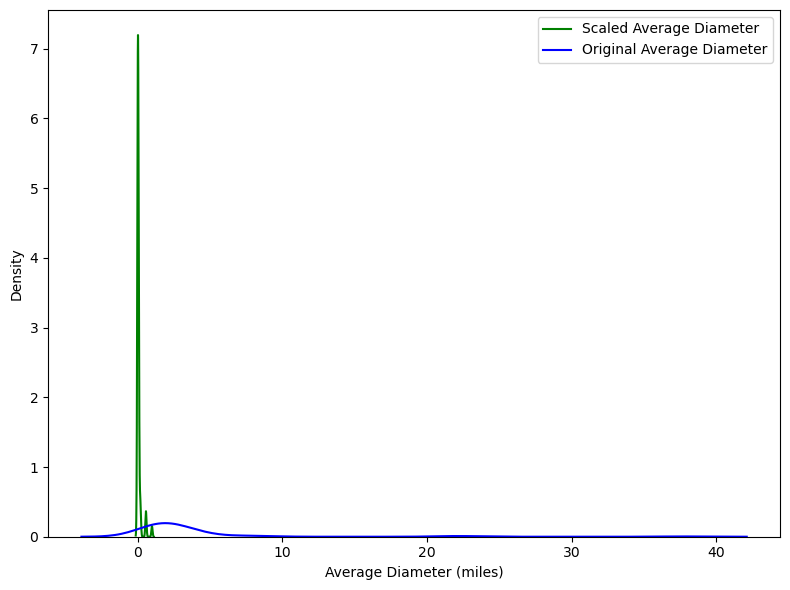

In [63]:
# Average Diameter (miles)
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots()

sns.kdeplot(neo_df_scaled['Average Diameter (miles)'], color="green", ax=axes, label='Scaled Average Diameter')
sns.kdeplot(neo_df['Average Diameter (miles)'], color="blue", ax=axes, label='Original Average Diameter')
axes.legend()
plt.tight_layout()

Since initially a few columns were dropped before scaling - adding those columns back to the dataframe.

In [64]:
neo_df_scaled[['Orbit Earth', 'Orbit Juptr', 'Orbit Mars', 'Orbit Merc', 'Orbit Venus']] = neo_df[['Orbit Earth', 'Orbit Juptr', 'Orbit Mars', 'Orbit Merc', 'Orbit Venus']]

In [65]:
neo_df_scaled

,Designation,Absolute Magnitude (H),Epoch Date Close Approach,Relative Velocity (km/s),Miss Distance (astronomical),Average Diameter (miles),Orbit Earth,Orbit Juptr,Orbit Mars,Orbit Merc,Orbit Venus
0,0.0,0.13083,0.002668,0.056507,0.155560,0.581538,1.0,0.0,0.0,0.0,0.0
1,0.0,0.13083,0.025467,0.027606,0.234985,0.581538,1.0,0.0,0.0,0.0,0.0
2,0.0,0.13083,0.056921,0.037913,0.249075,0.581538,1.0,0.0,0.0,0.0,0.0
3,0.0,0.13083,0.079782,0.032525,0.178317,0.581538,1.0,0.0,0.0,0.0,0.0
4,0.0,0.13083,0.102737,0.064860,0.084099,0.581538,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
899,1.0,0.52446,0.830333,0.348630,0.146442,0.104032,1.0,0.0,0.0,0.0,0.0
900,1.0,0.52446,0.860258,0.264868,0.149464,0.104032,1.0,0.0,0.0,0.0,0.0
901,1.0,0.52446,0.955491,0.230253,0.249205,0.104032,1.0,0.0,0.0,0.0,0.0
902,1.0,0.52446,0.956702,0.352911,0.149431,0.104032,1.0,0.0,0.0,0.0,0.0


In [66]:
# Train and test split

# creating a function which splits the data randomly
def split_train_test(data, test_ratio):
    np.random.seed(23) # setting the random number generator's seed for generating the same test & train sets each time.
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In this dataset we do not have too many instances to test on - since it has only 904 records. <br>
Therefore I will have the train & test split as 80 - 20 respectively.

In [67]:
neo_df_train, neo_df_test = split_train_test(neo_df_scaled, 0.2)

In [68]:
len(neo_df_train)

724

In [69]:
len(neo_df_test)

180

In [70]:
neo_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 530 to 595
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Designation                   724 non-null    float64
 1   Absolute Magnitude (H)        724 non-null    float64
 2   Epoch Date Close Approach     724 non-null    float64
 3   Relative Velocity (km/s)      724 non-null    float64
 4   Miss Distance (astronomical)  724 non-null    float64
 5   Average Diameter (miles)      724 non-null    float64
 6   Orbit Earth                   724 non-null    float64
 7   Orbit Juptr                   724 non-null    float64
 8   Orbit Mars                    724 non-null    float64
 9   Orbit Merc                    724 non-null    float64
 10  Orbit Venus                   724 non-null    float64
dtypes: float64(11)
memory usage: 67.9 KB


array([[<Axes: title={'center': 'Designation'}>,
        <Axes: title={'center': 'Absolute Magnitude (H)'}>,
        <Axes: title={'center': 'Epoch Date Close Approach'}>],
       [<Axes: title={'center': 'Relative Velocity (km/s)'}>,
        <Axes: title={'center': 'Miss Distance (astronomical)'}>,
        <Axes: title={'center': 'Average Diameter (miles)'}>],
       [<Axes: title={'center': 'Orbit Earth'}>,
        <Axes: title={'center': 'Orbit Juptr'}>,
        <Axes: title={'center': 'Orbit Mars'}>],
       [<Axes: title={'center': 'Orbit Merc'}>,
        <Axes: title={'center': 'Orbit Venus'}>, <Axes: >]], dtype=object)

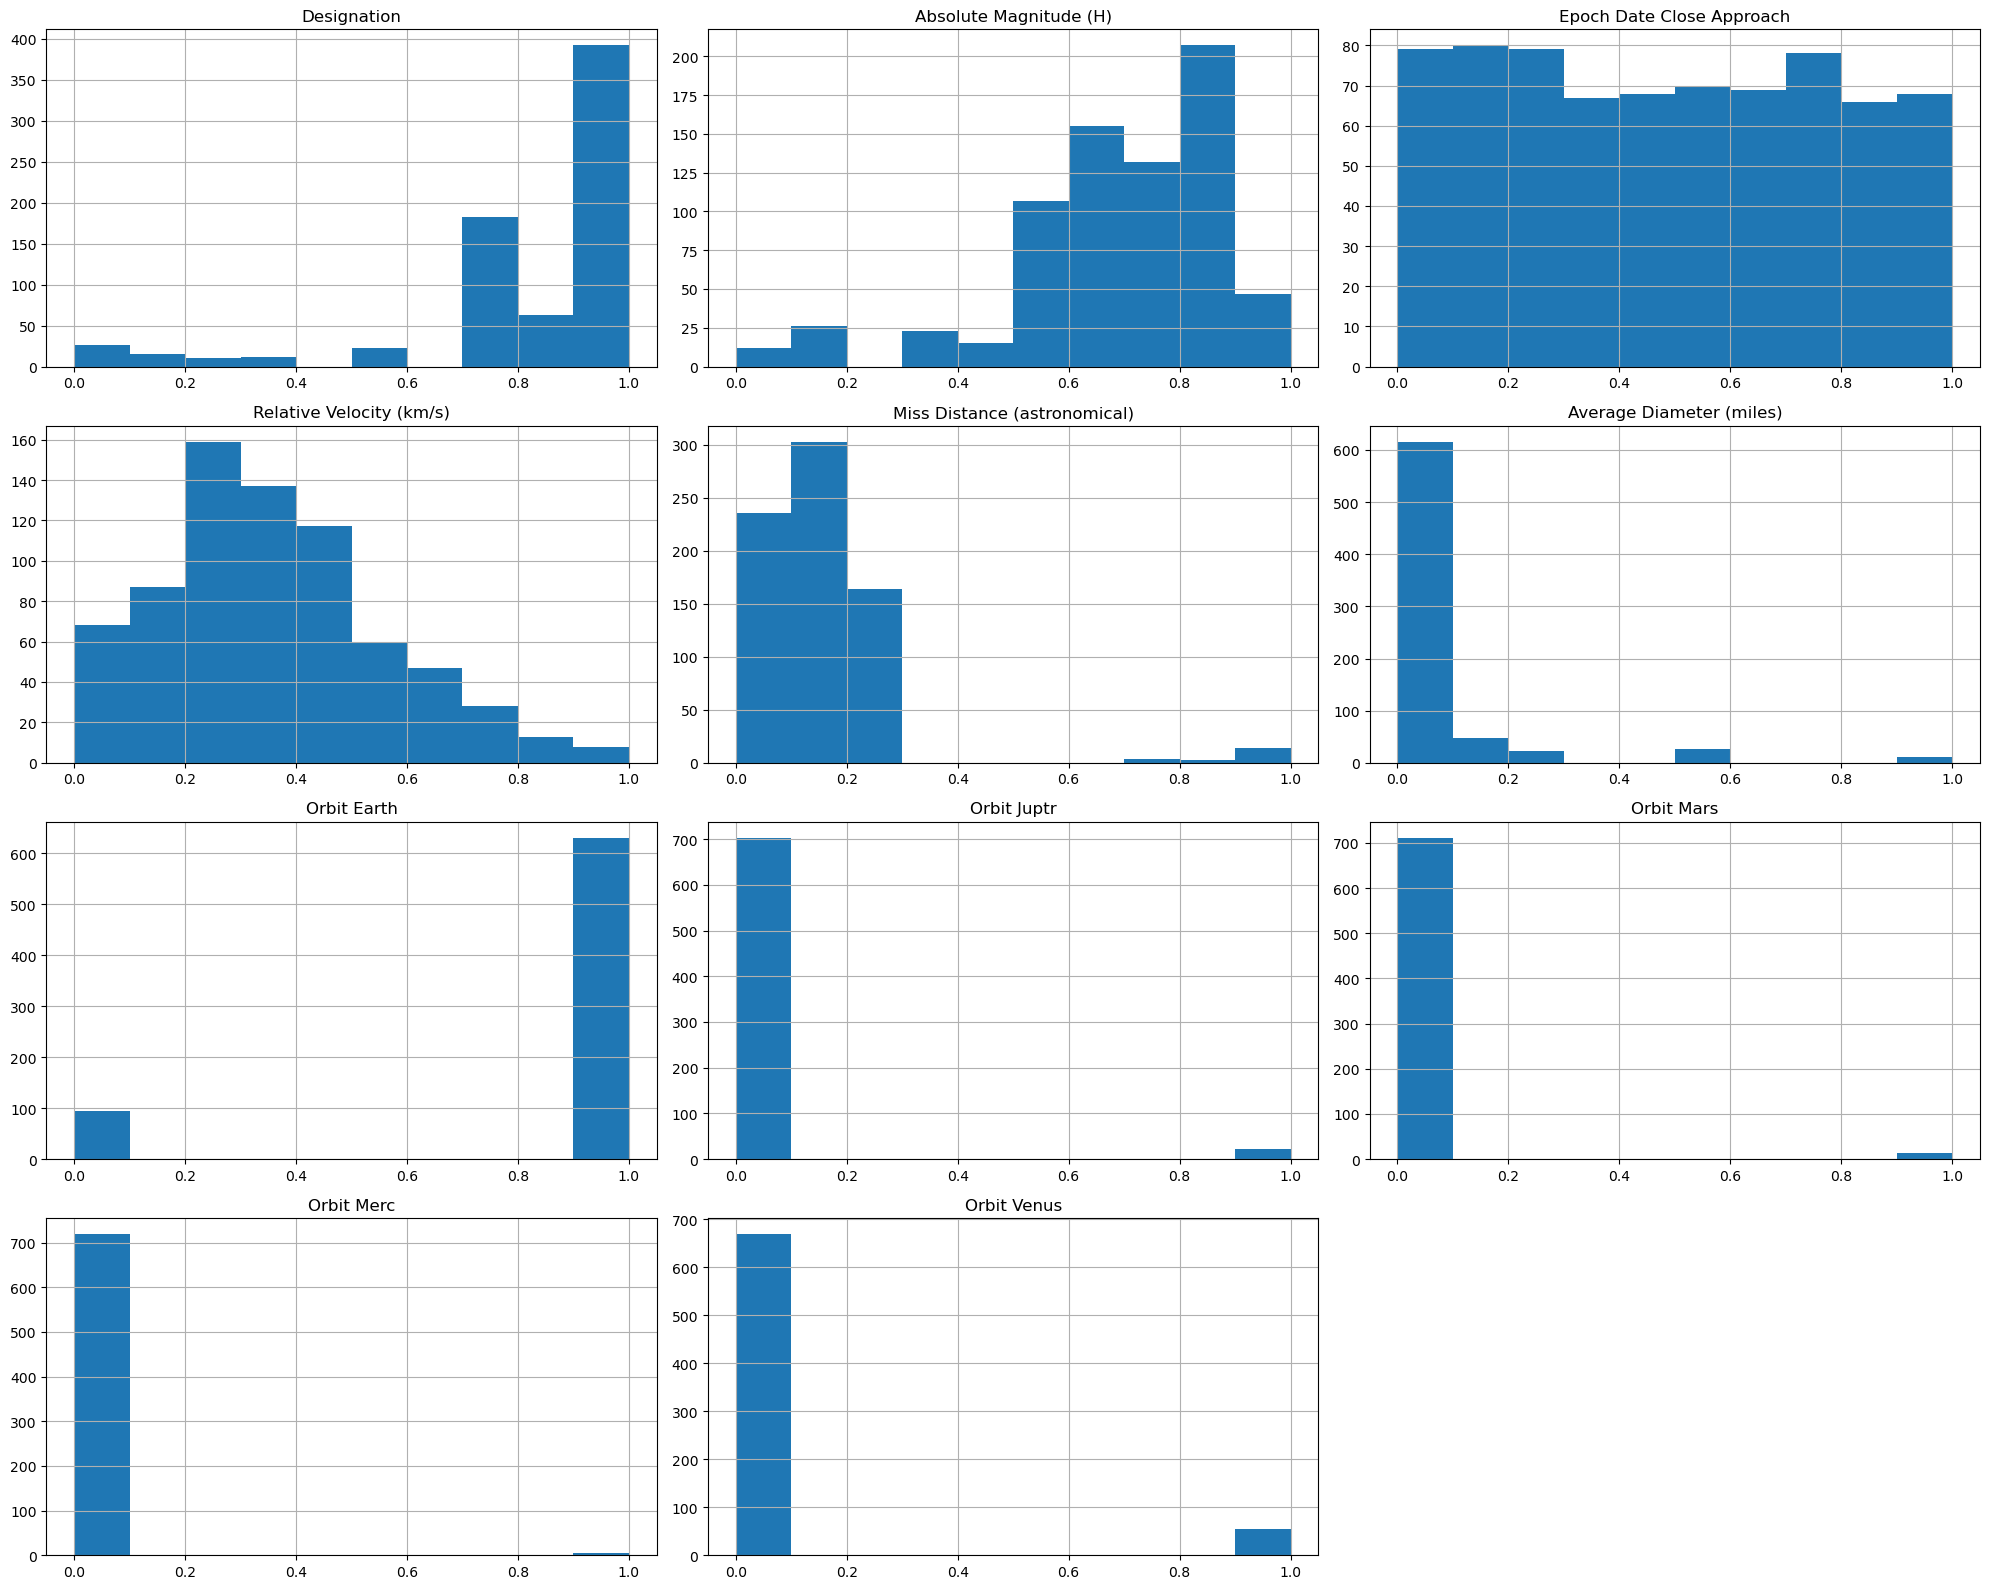

In [71]:
neo_df_train.hist(figsize=(20,16))

## Visualizing The Train Data

<Axes: xlabel='Miss Distance (astronomical)', ylabel='Average Diameter (miles)'>

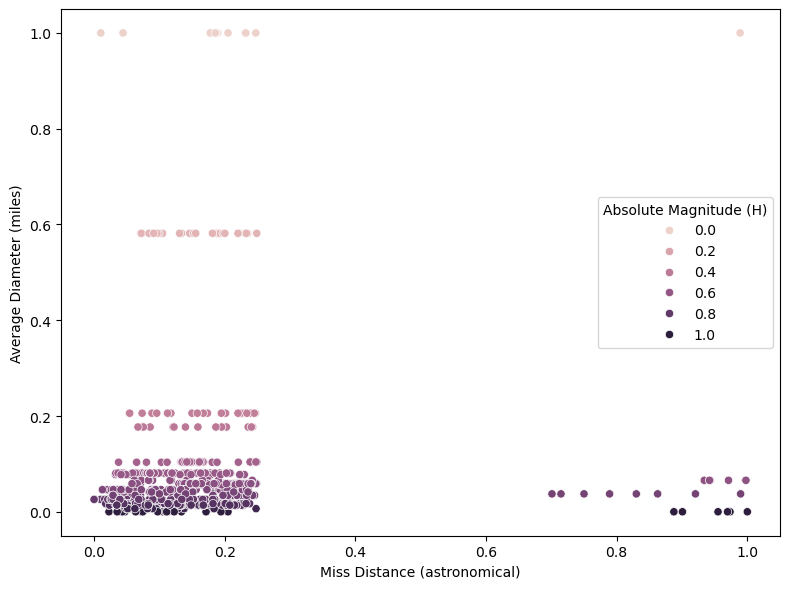

In [79]:
sns.scatterplot(neo_df_train, x='Miss Distance (astronomical)', y='Average Diameter (miles)', hue='Absolute Magnitude (H)')

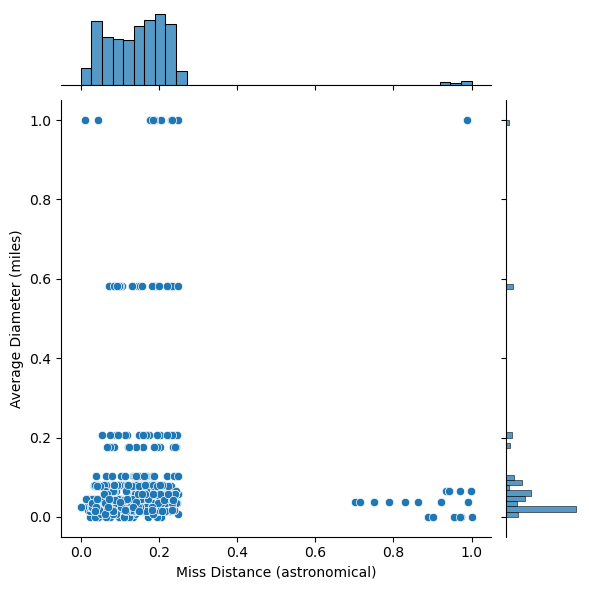

In [78]:
sns.jointplot(data=neo_df_train, x='Miss Distance (astronomical)', y='Average Diameter (miles)')

## K-Means Clustering

In [72]:
# import KMeans
from sklearn.cluster import KMeans

# initially let us start by creating 2 clusters - 
kmeans_neo = KMeans(n_clusters=2)
kmeans_neo.fit(neo_df_train)

KMeans(n_clusters=2)

In [74]:
print("Cluster memberships:\n{}".format(kmeans_neo.labels_))

Cluster memberships:
[1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1

The above point shows that the model has been able to make two different clusters for the data.

In [87]:
kmeans_neo.cluster_centers_

array([[ 7.86807685e-01,  7.63113306e-01,  4.91963766e-01,
         3.72707741e-01,  2.36196313e-01,  5.85751234e-02,
        -5.55111512e-16,  2.23404255e-01,  1.38297872e-01,
         5.31914894e-02,  5.85106383e-01],
       [ 7.98081284e-01,  6.78920852e-01,  4.86560516e-01,
         3.52340853e-01,  1.49582180e-01,  8.60933628e-02,
         1.00000000e+00,  8.67361738e-17,  5.20417043e-17,
         2.77555756e-17, -6.93889390e-17]])

In [88]:
len(kmeans_neo.cluster_centers_)

2

In [115]:
kmeans_neo.cluster_centers_[0][4]

0.23619631317497247

In [117]:
kmeans_neo.cluster_centers_[1][5]

0.08609336282327085

In [121]:
kmeans_neo.cluster_centers_[:, 4]

array([0.23619631, 0.14958218])

## Visualizing The Clusters

### Miss Distance vs Average Diameter

Text(0, 0.5, 'Scaled Average Diameter')

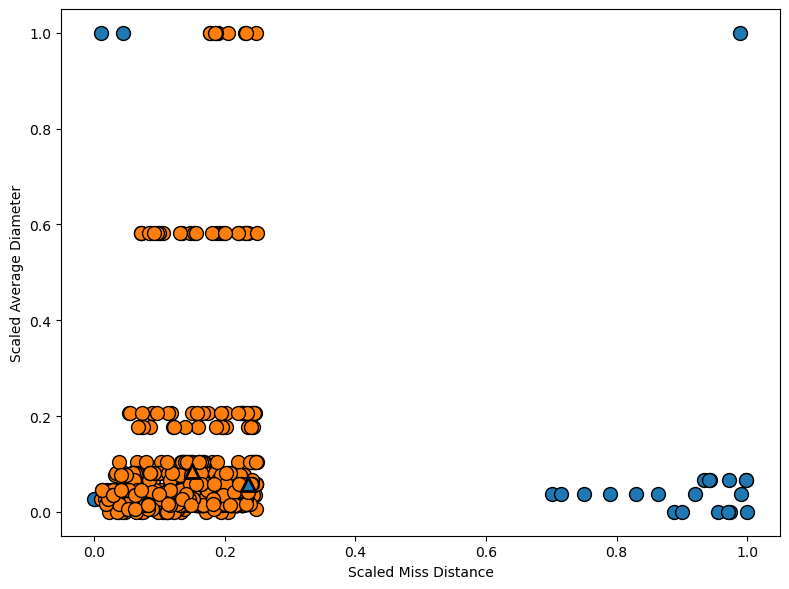

In [125]:
# using mglearn to plot the clusters
import mglearn

mglearn.discrete_scatter(neo_df_train['Miss Distance (astronomical)'], neo_df_train['Average Diameter (miles)'], kmeans_neo.labels_, markers='o')
mglearn.discrete_scatter(kmeans_neo.cluster_centers_[:, 4], kmeans_neo.cluster_centers_[:, 5], [0, 1], markers='^', markeredgewidth=2)
plt.xlabel("Scaled Miss Distance")
plt.ylabel("Scaled Average Diameter")

### Relative Velocity vs Miss Distance

Text(0.5, 0, 'Scaled Miss Distance')

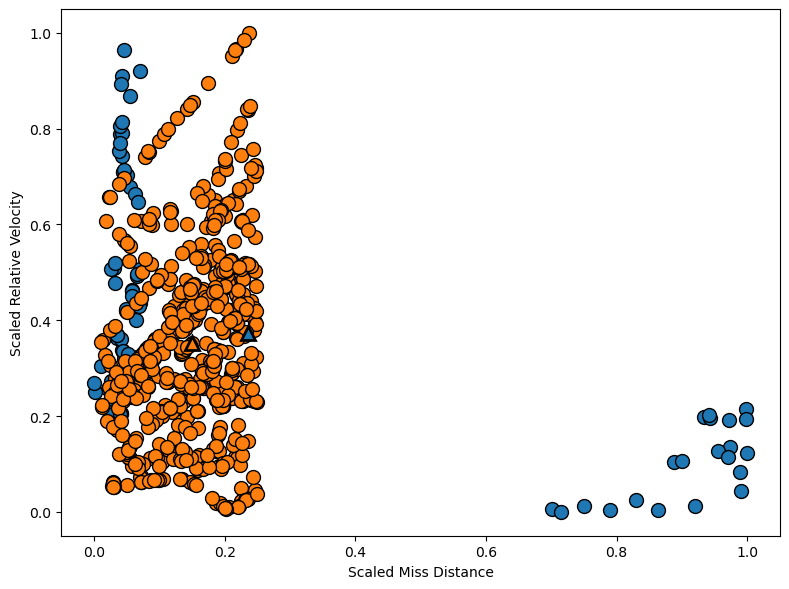

In [133]:
mglearn.discrete_scatter(neo_df_train['Miss Distance (astronomical)'], neo_df_train['Relative Velocity (km/s)'], kmeans_neo.labels_, markers='o')
mglearn.discrete_scatter(kmeans_neo.cluster_centers_[:, 4], kmeans_neo.cluster_centers_[:, 3], [0, 1], markers='^', markeredgewidth=2)
plt.ylabel("Scaled Relative Velocity")
plt.xlabel("Scaled Miss Distance")

Evaluating the K-Means cluster with k=2

In [128]:
kmeans_neo.inertia_

244.28538406631614

The inertia value is 244. <br>
We need to see which values of k will yield in a lower value of inertia.

In [129]:
inertia_list = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(neo_df_train)
    inertia_list.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

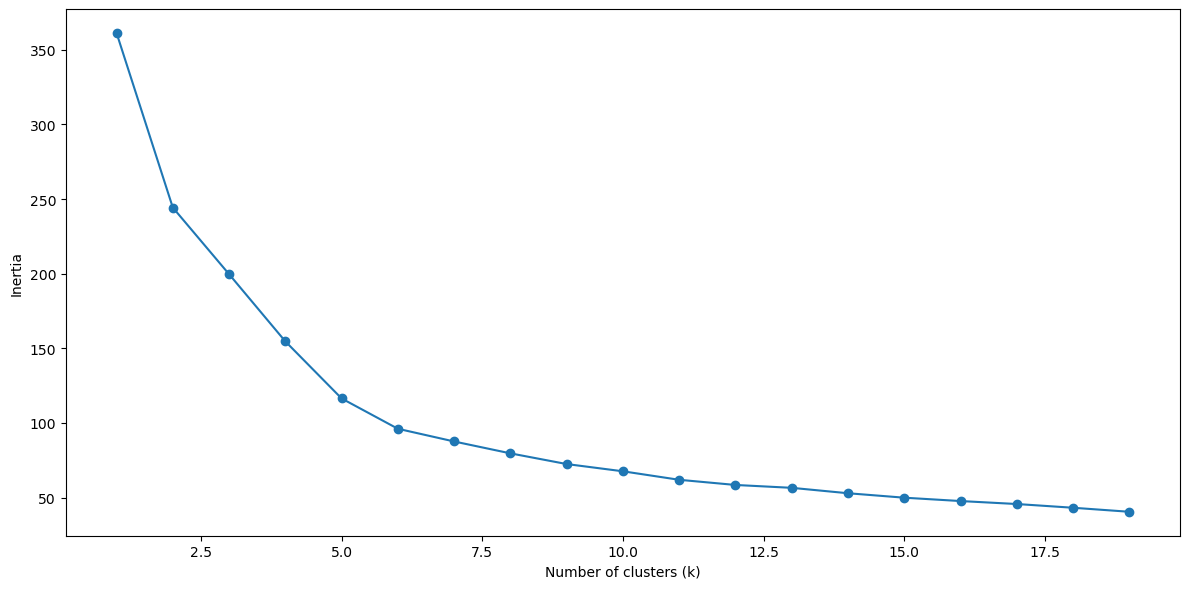

In [131]:
# converting the results into a dataframe 
frame = pd.DataFrame({'Cluster':range(1,20), 'Inertia':inertia_list})

# plotting the values on the graph
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['Inertia'], marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

We can use the elbow-method to take the best value of k. <br> 
Based on the graph above, we can see that k = 6 is a good vlaue of k.

In [132]:
kmeans_neo_six = KMeans(n_clusters=6, init='k-means++')
kmeans_neo_six.fit(neo_df_train)

KMeans(n_clusters=6)

Text(0, 0.5, 'Scaled Average Diameter')

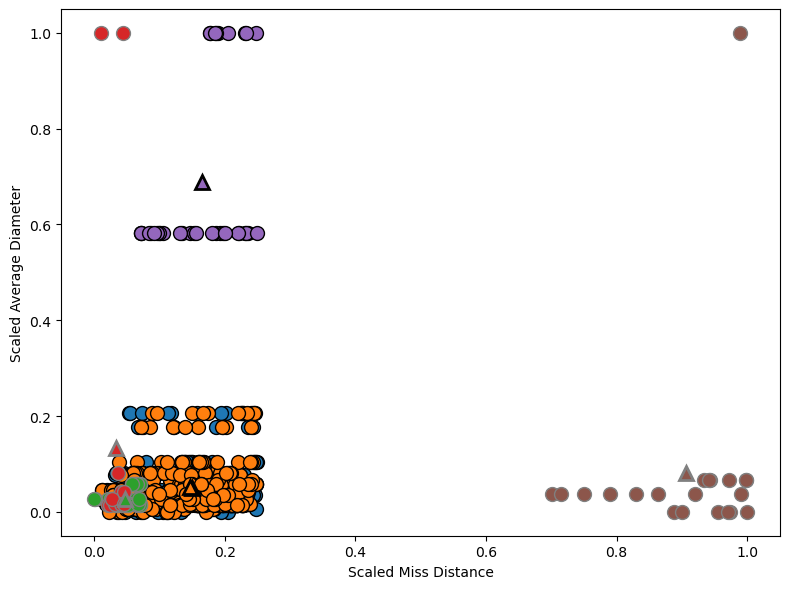

In [134]:
mglearn.discrete_scatter(neo_df_train['Miss Distance (astronomical)'], neo_df_train['Average Diameter (miles)'], kmeans_neo_six.labels_, markers='o')
mglearn.discrete_scatter(kmeans_neo_six.cluster_centers_[:, 4], kmeans_neo_six.cluster_centers_[:, 5], [0, 1, 2, 3, 4, 5], markers='^', markeredgewidth=2)
plt.xlabel("Scaled Miss Distance")
plt.ylabel("Scaled Average Diameter")

Text(0.5, 0, 'Scaled Miss Distance')

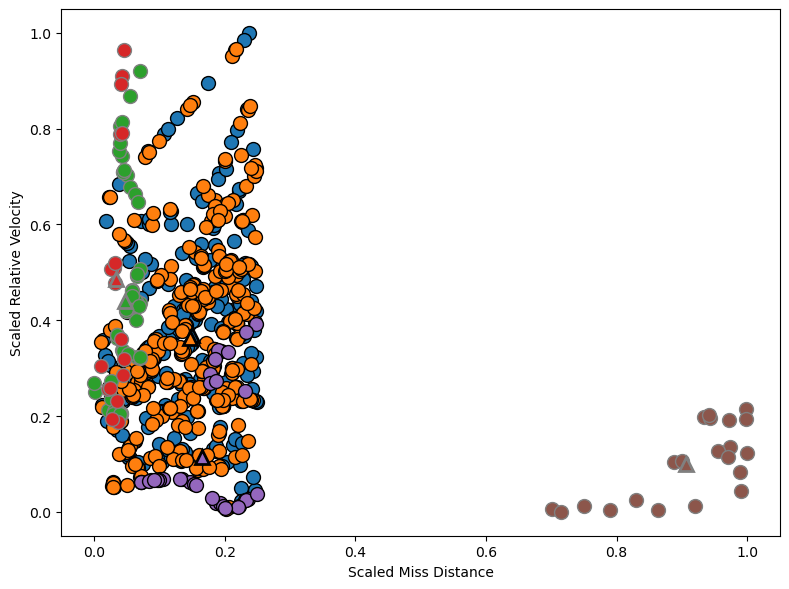

In [136]:
mglearn.discrete_scatter(neo_df_train['Miss Distance (astronomical)'], neo_df_train['Relative Velocity (km/s)'], kmeans_neo_six.labels_, markers='o')
mglearn.discrete_scatter(kmeans_neo_six.cluster_centers_[:, 4], kmeans_neo_six.cluster_centers_[:, 3], [0, 1, 2, 3, 4, 5], markers='^', markeredgewidth=2)
plt.ylabel("Scaled Relative Velocity")
plt.xlabel("Scaled Miss Distance")

In [137]:
kmeans_neo_six.inertia_

96.09052161345728

In [139]:
kmeans_six_labels = pd.DataFrame()
kmeans_six_labels['labels']= kmeans_neo_six.labels_

In [140]:
kmeans_six_labels['labels'].value_counts()

labels
0    303
1    292
2     55
4     35
5     21
3     18
Name: count, dtype: int64

## Gaussian Mixed Models

In [141]:
from matplotlib.colors import LogNorm
from sklearn.mixture import GaussianMixture

gmm_neo = GaussianMixture(n_components=2, covariance_type="full")
gmm_neo.fit(neo_df_train)

GaussianMixture(n_components=2)

### Miss Distance vs Average Diameter

In [171]:
neo_df_train.iloc[:, 3:6]

,Relative Velocity (km/s),Miss Distance (astronomical),Average Diameter (miles)
530,0.296499,0.174727,0.058729
207,0.509843,0.030171,0.017037
211,0.789399,0.039555,0.017037
685,0.332245,0.079233,0.013975
634,0.369142,0.034391,0.013975
...,...,...,...
31,0.066927,0.091368,0.581538
488,0.540975,0.134294,0.025848
40,0.011244,0.749982,0.037395
742,0.260181,0.148518,0.013975


In [173]:
from mpl_toolkits.mplot3d import Axes3D

# features to visualize
features_to_visualize = neo_df_train.iloc[:, 3:6]

# calculate x for Miss Distance (astronomical)
x = np.linspace(-20.0, -30.0)
# calculating y for Average Diameter
y = np.linspace(-20.0, 40.0)

# creating a meshgrid for each of the 11 features
feature1_range = np.linspace(min(features_to_visualize[:, 0]), max(features_to_visualize[:, 0]), 100)
feature2_range = np.linspace(min(features_to_visualize[:, 1]), max(features_to_visualize[:, 1]), 100)
feature3_range = np.linspace(min(features_to_visualize[:, 2]), max(features_to_visualize[:, 2]), 100)
feature4_range = np.linspace(min(features_to_visualize[:, 3]), max(features_to_visualize[:, 3]), 100)
feature5_range = np.linspace(min(features_to_visualize[:, 4]), max(features_to_visualize[:, 4]), 100)
feature6_range = np.linspace(min(features_to_visualize[:, 5]), max(features_to_visualize[:, 5]), 100)
feature7_range = np.linspace(min(features_to_visualize[:, 6]), max(features_to_visualize[:, 6]), 100)
feature8_range = np.linspace(min(features_to_visualize[:, 7]), max(features_to_visualize[:, 7]), 100)
feature9_range = np.linspace(min(features_to_visualize[:, 8]), max(features_to_visualize[:, 8]), 100)
feature10_range = np.linspace(min(features_to_visualize[:,9]), max(features_to_visualize[:, 9]), 100)
feature11_range = np.linspace(min(features_to_visualize[:,10]), max(features_to_visualize[:, 10]), 100)


feature1_grid, feature2_grid, feature3_grid, feature4_grid, feature5_grid, feature6_grid, feature7_grid, feature8_grid, feature9_grid, feature10_grid, feature11_grid = np.meshgrid(feature1_range, feature2_range, feature3_range, feature4_range, feature5_range, feature6_range ,feature7_range, feature8_range, feature9_range, feature10_range, feature11_range)
XYZ = np.column_stack((feature1_grid.ravel(), feature2_grid.ravel(), feature3_grid.ravel(), feature4_grid.ravel(), feature5_grid.ravel(), feature6_grid.ravel(), feature7_grid.ravel(), feature8_grid.ravel(), feature9_grid.ravel(), feature10_grid.ravel(), feature11_grid.ravel()))
# ravel is a function which helps to flatten an array

# Calculate the negative log likelihood scores
Z = -gmm_neo.score_samples(XYZ)
Z = Z.reshape(feature1_grid.shape)

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(feature1_grid, feature2_grid, Z, cmap='viridis', alpha=0.8)

# Scatter plot of the training data points
ax.scatter(features_to_visualize[:, 0], features_to_visualize[:, 1], -gmm_neo.score_samples(features_to_visualize), color='black', s=5)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Negative Log Likelihood')

plt.title('Negative Log Likelihood Prediction Graph (3D Projection)')


InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
# train GMM based on different values of the hyper-parameters

In [ ]:
# visualize the clusters
    # select any two or 3 features
    # select any other two or three features

In [ ]:
# use some distance measure to test the clusters

## PCA

In [176]:
from sklearn.decomposition import PCA
pca_neo = PCA(n_components=2)
pca_neo.fit(neo_df_train)
X_pca_neo = pca_neo.transform(neo_df_train)

print("Original shape: {}".format(str(neo_df_train.shape)))
print("Reduced shape: {}".format(str(X_pca_neo.shape)))

Original shape: (724, 11)
Reduced shape: (724, 2)


We can see above that from the 11 features in the original dataframe, we now have only 2 features after running the PCA.

In [180]:
# Getting the target class from the dataset
neo_df_target = pd.read_csv(neo_csv_path)
neo_df_target = neo_df_target['Is Potentially Hazardous']
neo_df_target

0      False
1      False
2      False
3      False
4      False
       ...  
899    False
900    False
901    False
902    False
903    False
Name: Is Potentially Hazardous, Length: 904, dtype: bool

In [182]:
# now performing the same train test split
neo_df_target_train, neo_df_target_test = split_train_test(neo_df_target, 0.2)

In [183]:
len(neo_df_target_train)

724

In [189]:
neo_df_target_train.unique()

array([False,  True])

Text(0, 0.5, 'Second principal component')

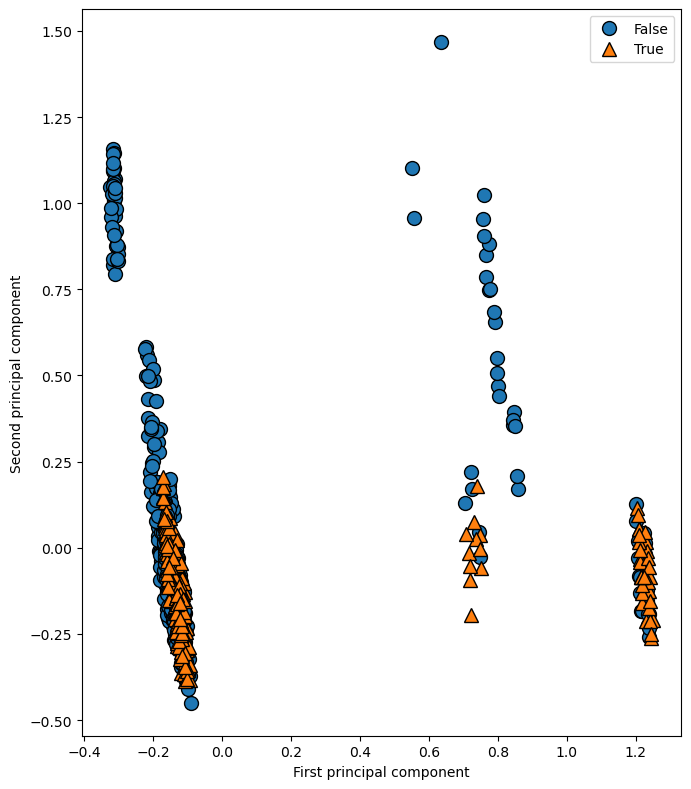

In [192]:
# plotting the first vs. second principal component, colored by target class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca_neo[:, 0], X_pca_neo[:, 1], neo_df_target_train)
plt.legend(neo_df_target_train.unique(), loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

If we visualize the above graph in a higher dimention, there could be a hyper-plane which segregates the two values.

## Independant Component Analysis (ICA)

In [198]:
from sklearn.decomposition import FastICA 
ica_neo = FastICA(n_components=2, random_state=12) 
X_ica =ica_neo.fit_transform(neo_df_train.values)

print("Original shape: {}".format(str(neo_df_train.shape)))
print("Reduced shape: {}".format(str(X_ica.shape)))

Original shape: (724, 11)
Reduced shape: (724, 2)


/opt/homebrew/anaconda3/envs/info6105/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


Text(0, 0.5, 'Second principal component')

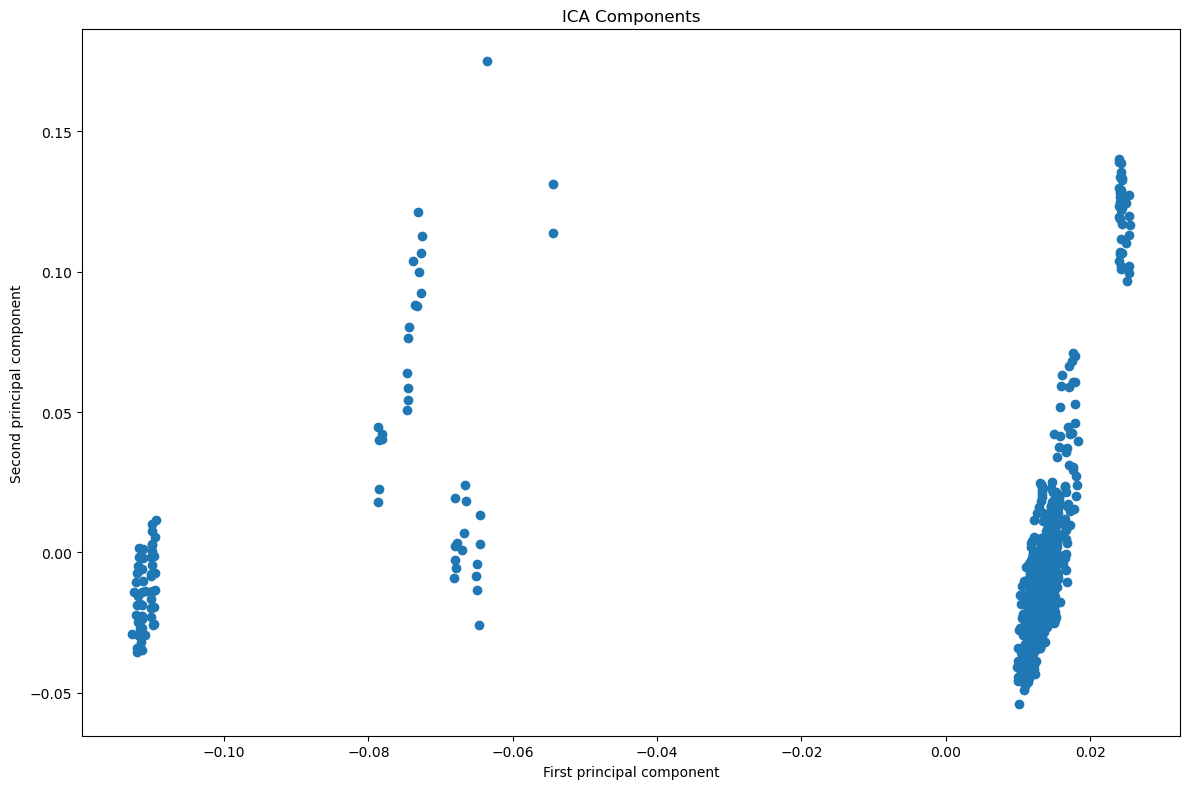

In [202]:
# visualizing the two important components
plt.figure(figsize=(12,8))
plt.title('ICA Components')
plt.scatter(X_ica[:,0], X_ica[:,1])
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [203]:
ica_neo_3 = FastICA(n_components=3, random_state=12) 
X_ica_3 =ica_neo_3.fit_transform(neo_df_train.values)

print("Original shape: {}".format(str(neo_df_train.shape)))
print("Reduced shape: {}".format(str(X_ica_3.shape)))

Original shape: (724, 11)
Reduced shape: (724, 3)


/opt/homebrew/anaconda3/envs/info6105/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


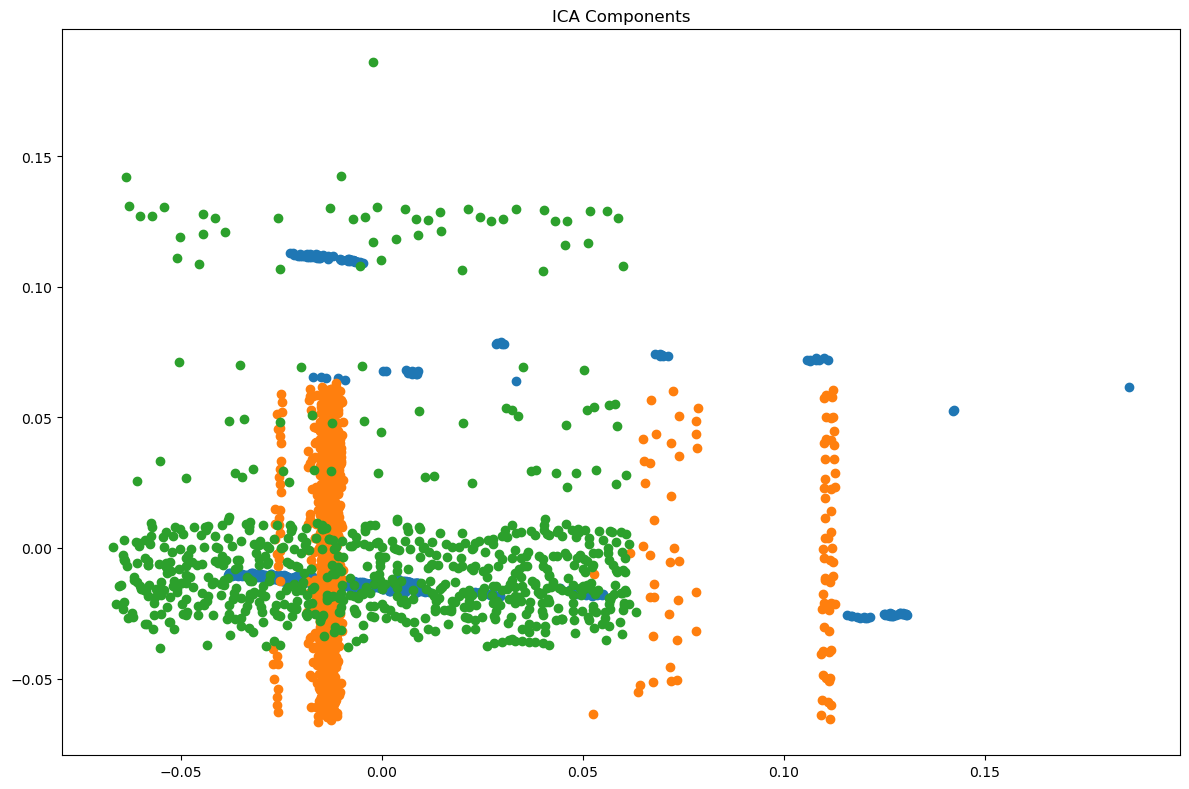

In [204]:
plt.figure(figsize=(12,8))
plt.title('ICA Components')
plt.scatter(X_ica_3[:,0], X_ica_3[:,1])
plt.scatter(X_ica_3[:,1], X_ica_3[:,2])
plt.scatter(X_ica_3[:,2], X_ica_3[:,0])

## K-Means Clustering After PCA

Since for the above PCA dimentionality reduction algorithm we reduced the dimensions to 2, let us run the k-means algorithm such that k = 2.

In [205]:
# X_pca_neo
pca_kmeans_neo = KMeans(n_clusters=2)
pca_kmeans_neo.fit(X_pca_neo) 
# here we are training the data on the result of the PCA algorithm.

KMeans(n_clusters=2)

In [209]:
X_pca_neo

array([[-0.15984019,  0.08702376],
       [ 0.75203574, -0.05819567],
       [ 0.72066696, -0.19617252],
       ...,
       [ 0.76096892,  0.9054411 ],
       [-0.11871637, -0.30326972],
       [-0.13053969, -0.26321127]])

In [208]:
X_pca_neo[:,0]

array([-0.15984019,  0.75203574,  0.72066696, -0.12375572,  1.22645249,
       -0.12423728, -0.16366917, -0.10416226, -0.16544604,  1.21941202,
       -0.16026127, -0.16085577, -0.16288688, -0.14453025, -0.18700165,
       -0.14690408, -0.12073731, -0.1354847 , -0.14368545, -0.15699485,
       -0.1019839 , -0.1565895 ,  1.23069903, -0.11345726,  1.23054714,
        1.2337862 , -0.11959715, -0.16871722, -0.11023558, -0.13857277,
       -0.13645156,  1.23291321,  1.19954648, -0.10719431, -0.32543175,
       -0.16084082, -0.1268222 , -0.14886456, -0.15347268, -0.11978123,
        0.74685529, -0.12558445, -0.17665003, -0.12967181, -0.16057876,
       -0.12770591, -0.1165827 , -0.16487493, -0.1350773 , -0.15742864,
       -0.13078181, -0.12943663, -0.15685417,  0.79063718, -0.11543728,
       -0.12914127, -0.12813236, -0.13317994, -0.14542396, -0.1356148 ,
       -0.11920097, -0.17171832, -0.11922172, -0.13394536, -0.16554621,
       -0.15992833, -0.13170041, -0.14627461, -0.10100699,  0.54

In [210]:
X_pca_neo[:,1]

array([ 8.70237572e-02, -5.81956705e-02, -1.96172523e-01, -2.14654306e-01,
       -1.92040127e-02, -1.55599680e-01, -1.15634330e-02, -3.87077152e-01,
       -1.05466222e-01, -1.59485514e-01,  8.03876300e-02, -1.07563765e-03,
       -1.30782520e-02, -2.35799828e-02,  3.07525650e-01,  3.76984630e-02,
       -9.37237835e-02, -1.83360378e-01, -1.16644077e-01, -1.40754738e-02,
       -2.96956043e-01, -1.51646530e-01, -2.12663789e-01, -2.17040203e-01,
        1.75862395e-02, -1.65405232e-01, -1.43180586e-01,  1.45637412e-01,
       -1.94165481e-01, -1.08975207e-01, -7.98327022e-02, -8.49972202e-03,
        1.26367930e-01, -1.28114153e-01,  1.04762699e+00,  8.97550456e-02,
       -2.25063089e-01,  2.90889421e-03,  1.58869350e-01, -1.39326426e-01,
        3.67555465e-02, -1.96014447e-01,  1.12771294e-01, -2.45861404e-02,
        5.74464421e-02, -6.85467196e-02, -1.83777631e-01, -4.53442177e-02,
       -7.02074367e-02,  9.17640396e-02,  1.21054290e-02, -5.44642412e-02,
       -2.04064035e-01,  

Text(0.5, 0, 'Scaled Miss Distance')

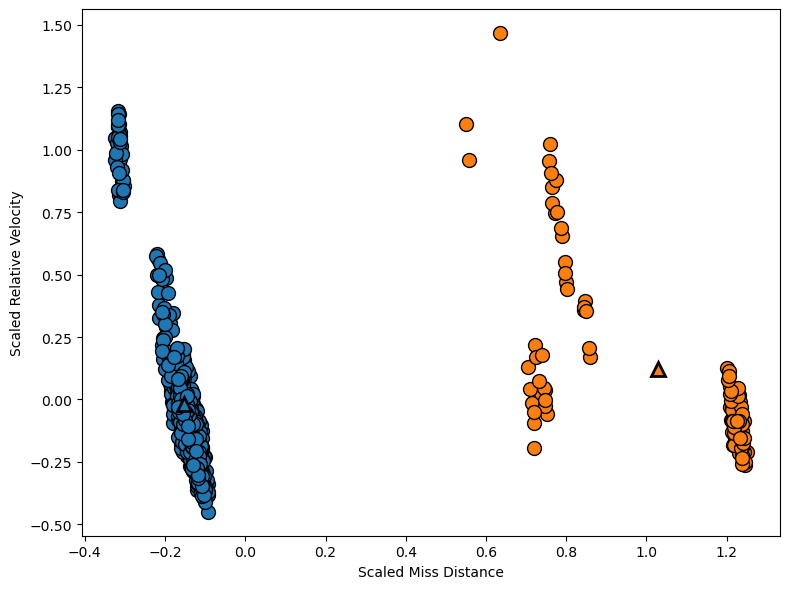

In [211]:
mglearn.discrete_scatter(X_pca_neo[:,0], X_pca_neo[:, 1], pca_kmeans_neo.labels_, markers='o')
mglearn.discrete_scatter(pca_kmeans_neo.cluster_centers_[:, 0], pca_kmeans_neo.cluster_centers_[:, 1], [0, 1], markers='^', markeredgewidth=2)
plt.ylabel("Scaled Relative Velocity")
plt.xlabel("Scaled Miss Distance")

## Neural Network Model

In [212]:
import tensorflow as tf
from tensorflow import keras

ann_model = keras.models.Sequential()
ann_model.add(keras.layers.Dense(50, activation="relu"))
ann_model.add(keras.layers.Dense(25, activation="relu"))
ann_model.add(keras.layers.Dense(10, activation="relu"))
ann_model.add(keras.layers.Dense(5, activation="relu"))
ann_model.add(keras.layers.Dense(1, activation="sigmoid"))

In [213]:
# similar to the above decision tree example, we are adding the loss to be binary cross entropy using the adam optimizer
ann_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

# now running the training on the ANNs
# we will train the neural network 20 times with a batch size of 5. 
ann_model.fit(neo_df_train, neo_df_target_train, epochs=20, batch_size=5)

Epoch 1/20
145/145 [==============================] - 0s 649us/step - loss: 0.6824 - accuracy: 0.7003
Epoch 2/20
145/145 [==============================] - 0s 681us/step - loss: 0.6639 - accuracy: 0.7086
Epoch 3/20
145/145 [==============================] - 0s 734us/step - loss: 0.6432 - accuracy: 0.7251
Epoch 4/20
145/145 [==============================] - 0s 716us/step - loss: 0.6234 - accuracy: 0.7610
Epoch 5/20
145/145 [==============================] - 0s 711us/step - loss: 0.6023 - accuracy: 0.7528
Epoch 6/20
145/145 [==============================] - 0s 709us/step - loss: 0.5792 - accuracy: 0.7707
Epoch 7/20
145/145 [==============================] - 0s 675us/step - loss: 0.5560 - accuracy: 0.7762
Epoch 8/20
145/145 [==============================] - 0s 826us/step - loss: 0.5402 - accuracy: 0.7845
Epoch 9/20
145/145 [==============================] - 0s 810us/step - loss: 0.5283 - accuracy: 0.7790
Epoch 10/20
145/145 [==============================] - 0s 751us/step - loss: 0.520

In [214]:
loss, accuracy = ann_model.evaluate(neo_df_train, neo_df_target_train)
print(accuracy)

23/23 [==============================] - 0s 533us/step - loss: 0.4820 - accuracy: 0.7970
0.7969613075256348


The ANN model has a training accuracy of 79.69%

In [215]:
test_loss, test_accuracy = ann_model.evaluate(neo_df_test, neo_df_target_test)
test_accuracy

6/6 [==============================] - 0s 865us/step - loss: 0.4597 - accuracy: 0.8222


0.8222222328186035

The testing accuracy of the ANN model is 82.22%

This is also higher than the test accuracy of 68.88% which was seen in Assignment 2.

## PCA & then Re-Running Neural Network

In [216]:
X_pca_neo

array([[-0.15984019,  0.08702376],
       [ 0.75203574, -0.05819567],
       [ 0.72066696, -0.19617252],
       ...,
       [ 0.76096892,  0.9054411 ],
       [-0.11871637, -0.30326972],
       [-0.13053969, -0.26321127]])

In [218]:
# X_pca_neo
pca_ann_model = keras.models.Sequential()
pca_ann_model.add(keras.layers.Dense(50, activation="relu"))
pca_ann_model.add(keras.layers.Dense(25, activation="relu"))
pca_ann_model.add(keras.layers.Dense(10, activation="relu"))
pca_ann_model.add(keras.layers.Dense(5, activation="relu"))
pca_ann_model.add(keras.layers.Dense(1, activation="sigmoid"))

In [219]:
# similar to the above decision tree example, we are adding the loss to be binary cross entropy using the adam optimizer
pca_ann_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

# now running the training on the ANNs
# we will train the neural network 20 times with a batch size of 5. 
pca_ann_model.fit(X_pca_neo, neo_df_target_train, epochs=20, batch_size=5)

Epoch 1/20


145/145 [==============================] - 0s 619us/step - loss: 0.6422 - accuracy: 0.6671
Epoch 2/20
145/145 [==============================] - 0s 567us/step - loss: 0.5742 - accuracy: 0.6948
Epoch 3/20
145/145 [==============================] - 0s 553us/step - loss: 0.5658 - accuracy: 0.7044
Epoch 4/20
145/145 [==============================] - 0s 550us/step - loss: 0.5618 - accuracy: 0.7169
Epoch 5/20
145/145 [==============================] - 0s 532us/step - loss: 0.5590 - accuracy: 0.7182
Epoch 6/20
145/145 [==============================] - 0s 551us/step - loss: 0.5572 - accuracy: 0.7169
Epoch 7/20
145/145 [==============================] - 0s 559us/step - loss: 0.5572 - accuracy: 0.7169
Epoch 8/20
145/145 [==============================] - 0s 555us/step - loss: 0.5564 - accuracy: 0.7141
Epoch 9/20
145/145 [==============================] - 0s 560us/step - loss: 0.5557 - accuracy: 0.7169
Epoch 10/20
145/145 [==============================] - 0s 573us/step - loss: 0.5560 - accurac

In [220]:
loss_pca_ann, accuracy_pca_ann = pca_ann_model.evaluate(X_pca_neo, neo_df_target_train)
print(accuracy_pca_ann)

23/23 [==============================] - 0s 517us/step - loss: 0.5496 - accuracy: 0.7182
0.7182320356369019


This ANN model has a training accuracy of 71.82%

In [223]:
# We need to run the PCA on the test data too before we can test the ANN model.
X_pca_neo_test = pca_neo.transform(neo_df_test)
print(len(X_pca_neo_test))
print(X_pca_neo_test)

180
[[-1.50139746e-01 -1.40574118e-01]
 [ 1.23042400e+00 -5.22597851e-02]
 [ 8.54025018e-01  1.74942298e-01]
 [-1.05588576e-01 -2.43630953e-01]
 [-1.23194354e-01 -2.73536367e-01]
 [-1.34289334e-01 -2.83363730e-03]
 [-1.19822331e-01 -1.55405003e-01]
 [-1.18599820e-01 -9.57628993e-02]
 [ 1.24123923e+00 -2.58054486e-01]
 [-1.09933425e-01 -1.87132200e-01]
 [-1.37558771e-01 -1.77970461e-01]
 [-1.50570291e-01 -1.24760454e-01]
 [-1.05635987e-01 -1.75417796e-01]
 [-1.41684204e-01 -7.60259842e-02]
 [-1.61850305e-01 -3.47037876e-02]
 [-1.44891485e-01 -9.89742731e-02]
 [-9.82959719e-02 -3.97801168e-01]
 [-1.32064797e-01 -1.62849161e-01]
 [ 1.23027061e+00 -9.62738774e-02]
 [-1.51005306e-01  2.33096940e-02]
 [-1.70406302e-01  1.29395183e-01]
 [ 1.22069311e+00 -1.77543866e-01]
 [-1.65062788e-01  1.58852529e-01]
 [-1.37869147e-01  2.52024721e-02]
 [-1.28641694e-01 -7.39199110e-02]
 [-1.44504004e-01 -3.77695161e-02]
 [-1.20565246e-01 -1.87004083e-01]
 [-1.16121221e-01 -1.00268259e-01]
 [-1.72293538e-0

In [224]:
test_loss_pca_ann, test_accuracy_pca_ann = pca_ann_model.evaluate(X_pca_neo_test, neo_df_target_test)
test_accuracy_pca_ann

6/6 [==============================] - 0s 867us/step - loss: 0.5882 - accuracy: 0.7000


0.699999988079071

The testing accuracy of the PCA on ANN model is 69.99%

# ANN with All Features + K Means Cluster ID (k=6)

In [225]:
kmeans_neo_six_train_labels = neo_df_train
kmeans_neo_six_train_labels['label'] = kmeans_neo_six.labels_
kmeans_neo_six_train_labels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 530 to 595
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Designation                   724 non-null    float64
 1   Absolute Magnitude (H)        724 non-null    float64
 2   Epoch Date Close Approach     724 non-null    float64
 3   Relative Velocity (km/s)      724 non-null    float64
 4   Miss Distance (astronomical)  724 non-null    float64
 5   Average Diameter (miles)      724 non-null    float64
 6   Orbit Earth                   724 non-null    float64
 7   Orbit Juptr                   724 non-null    float64
 8   Orbit Mars                    724 non-null    float64
 9   Orbit Merc                    724 non-null    float64
 10  Orbit Venus                   724 non-null    float64
 11  label                         724 non-null    int32  
dtypes: float64(11), int32(1)
memory usage: 86.9 KB


/var/folders/3m/tt_kbz7d2tx3f5cx3v4nd4940000gn/T/ipykernel_5819/4019724243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmeans_neo_six_train_labels['label'] = kmeans_neo_six.labels_


In [226]:
# training the ANN

k_6_ann_model = keras.models.Sequential()
k_6_ann_model.add(keras.layers.Dense(50, activation="relu"))
k_6_ann_model.add(keras.layers.Dense(25, activation="relu"))
k_6_ann_model.add(keras.layers.Dense(10, activation="relu"))
k_6_ann_model.add(keras.layers.Dense(5, activation="relu"))
k_6_ann_model.add(keras.layers.Dense(1, activation="sigmoid"))

# similar to the above decision tree example, we are adding the loss to be binary cross entropy using the adam optimizer
k_6_ann_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

# now running the training on the ANNs
# we will train the neural network 20 times with a batch size of 5. 
k_6_ann_model.fit(kmeans_neo_six_train_labels, neo_df_target_train, epochs=20, batch_size=5)

Epoch 1/20
145/145 [==============================] - 0s 643us/step - loss: 0.6379 - accuracy: 0.6892
Epoch 2/20
145/145 [==============================] - 0s 604us/step - loss: 0.5828 - accuracy: 0.6975
Epoch 3/20
145/145 [==============================] - 0s 618us/step - loss: 0.5544 - accuracy: 0.7113
Epoch 4/20
145/145 [==============================] - 0s 717us/step - loss: 0.5302 - accuracy: 0.7224
Epoch 5/20
145/145 [==============================] - 0s 764us/step - loss: 0.5072 - accuracy: 0.7583
Epoch 6/20
145/145 [==============================] - 0s 772us/step - loss: 0.4992 - accuracy: 0.7528
Epoch 7/20
145/145 [==============================] - 0s 792us/step - loss: 0.4897 - accuracy: 0.7735
Epoch 8/20
145/145 [==============================] - 0s 746us/step - loss: 0.4797 - accuracy: 0.7790
Epoch 9/20
145/145 [==============================] - 0s 775us/step - loss: 0.4897 - accuracy: 0.7528
Epoch 10/20
145/145 [==============================] - 0s 710us/step - loss: 0.473

In [228]:
loss_k_6, accuracy_k_6 = k_6_ann_model.evaluate(kmeans_neo_six_train_labels, neo_df_target_train)
print(accuracy_k_6)

23/23 [==============================] - 0s 491us/step - loss: 0.3858 - accuracy: 0.8135
0.8135359287261963


The ANN model containing all the features + the K-Means Cluster ID has a training accuracy of 81.35%.

In [232]:
# First running the k-means on the test data
kmeans_neo_six_test = KMeans(n_clusters=6, init='k-means++')
kmeans_neo_six_test.fit(neo_df_test)

# Using the k-means on test data, we can prepare the data for the test set
kmeans_neo_six_test_labels = neo_df_test
kmeans_neo_six_test_labels['label'] = kmeans_neo_six_test.labels_
kmeans_neo_six_test_labels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 411 to 596
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Designation                   180 non-null    float64
 1   Absolute Magnitude (H)        180 non-null    float64
 2   Epoch Date Close Approach     180 non-null    float64
 3   Relative Velocity (km/s)      180 non-null    float64
 4   Miss Distance (astronomical)  180 non-null    float64
 5   Average Diameter (miles)      180 non-null    float64
 6   Orbit Earth                   180 non-null    float64
 7   Orbit Juptr                   180 non-null    float64
 8   Orbit Mars                    180 non-null    float64
 9   Orbit Merc                    180 non-null    float64
 10  Orbit Venus                   180 non-null    float64
 11  label                         180 non-null    int32  
dtypes: float64(11), int32(1)
memory usage: 17.6 KB


/var/folders/3m/tt_kbz7d2tx3f5cx3v4nd4940000gn/T/ipykernel_5819/2863434271.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmeans_neo_six_test_labels['label'] = kmeans_neo_six_test.labels_


In [233]:
test_loss_k_6, test_accuracy_k_6 = k_6_ann_model.evaluate(kmeans_neo_six_test_labels, neo_df_target_test)
test_accuracy_k_6

6/6 [==============================] - 0s 911us/step - loss: 0.4284 - accuracy: 0.8000


0.800000011920929

# Dataset 2

In [234]:
# reading the second dataset into dataframe objects
heart_dataset_path = 'data/heart_attack_prediction_dataset.csv'
heart_df = pd.read_csv(heart_dataset_path)

In [235]:
# Fist 5 rows
heart_df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [236]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [237]:
heart_df.nunique()

Patient ID                         8763
Age                                  73
Sex                                   2
Cholesterol                         281
Blood Pressure                     3915
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8763
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8763
Income                             8615
BMI                                8763
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Country                              20
Continent                             6
Hemisphere                            2


In [238]:
# understanding the target column data
heart_df["Heart Attack Risk"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8763 entries, 0 to 8762
Series name: Heart Attack Risk
Non-Null Count  Dtype
--------------  -----
8763 non-null   int64
dtypes: int64(1)
memory usage: 68.6 KB


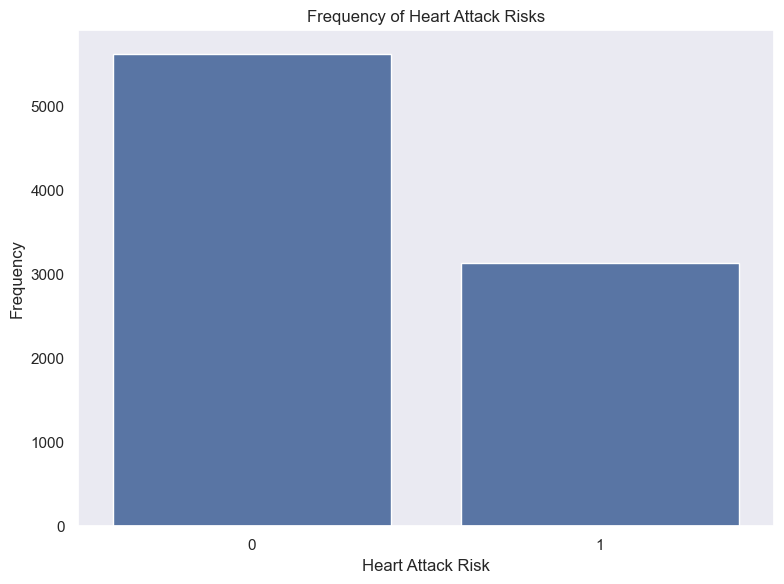

In [243]:
from collections import Counter
# similar to the previous dataset, we find the frequency of the output variable 'Heart Attack Risk'
heart_attack_risk_freq = Counter(heart_df["Heart Attack Risk"])
heart_attack_risk_freq

sns.set(style="dark")
plt.figure(figsize = (8,6))
sns.barplot(x=list(heart_attack_risk_freq.keys()), y=list(heart_attack_risk_freq.values()))
plt.xlabel("Heart Attack Risk")
plt.ylabel("Frequency")
plt.title("Frequency of Heart Attack Risks")
plt.show()

<Figure size 800x600 with 0 Axes>

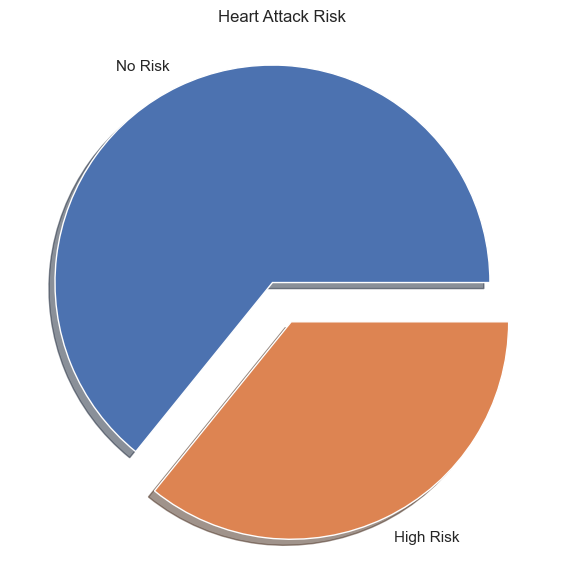

<Figure size 800x600 with 0 Axes>

In [244]:
# visualiing the same on a pie chart
plt.pie(heart_df["Heart Attack Risk"].value_counts(), 
        labels=["No Risk", "High Risk"], 
        shadow=True, 
        explode=[0.1,0.1])
plt.title("Heart Attack Risk")
plt.figure(figsize=(8,6))

### Removing unneccesary columns

In [245]:
heart_df.drop(columns=["Patient ID"], inplace=True)

### Removing the target column

In [246]:
heart_df_label = heart_df["Heart Attack Risk"]
heart_df.drop(columns=['Heart Attack Risk'], inplace=True)
heart_df_label

0       0
1       0
2       0
3       0
4       0
       ..
8758    0
8759    0
8760    1
8761    0
8762    1
Name: Heart Attack Risk, Length: 8763, dtype: int64

### Preparing Catagorical Data

In [247]:
# now performing One Hot Encoding on Gender column

label_encoder_heart = LabelEncoder()
gender_integer_encoded = label_encoder_heart.fit_transform(heart_df['Sex'])
gender_integer_encoded = gender_integer_encoded.reshape(len(gender_integer_encoded), 1)
# above we are reshaoing the array such that it forms a vector
print(gender_integer_encoded)

one_hot_encoder_heart = OneHotEncoder(sparse=False)
gender_one_hot_encoded = one_hot_encoder_heart.fit_transform(gender_integer_encoded)
print(gender_one_hot_encoded)

# one_hot_encoder = OneHotEncoder(sparse=False)
# orbit_body_one_hot_encoded = one_hot_encoder.fit_transform(orbit_integer_encoded)
# orbit_body_one_hot_encoded

[[1]
 [1]
 [0]
 ...
 [1]
 [1]
 [0]]
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [249]:
one_hot_encoder_heart.categories_

[array([0, 1])]

In [250]:
label_encoder_heart.classes_

array(['Female', 'Male'], dtype=object)

We can see from the above that <br>
Female = 0 <br>
Male = 1

In [267]:
# orbit_body_one_hot_encoded.shape
gender_one_hot_encoded.shape

(8763, 2)

In [269]:
heart_df[['Is Female', 'Is Male']] = gender_one_hot_encoded

In [270]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   float64
 12  Previous Heart Probl

In [271]:
heart_df.sample(10)

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Blood Pressure Systolic,Blood Pressure Diastolic,Is Female,Is Male
8606,42,Male,235,161/97,94,0,1,1,0,0,...,363,5,5,2,5,1,161,97,0.0,1.0
4650,59,Male,125,137/70,56,1,1,1,0,1,...,799,5,9,15,3,1,137,70,0.0,1.0
2001,77,Male,354,146/89,101,0,1,1,0,0,...,135,6,8,0,5,1,146,89,0.0,1.0
3631,76,Female,260,154/73,46,1,1,1,1,0,...,116,7,9,0,5,1,154,73,1.0,0.0
8516,31,Male,194,107/92,63,1,0,1,0,0,...,375,1,8,1,2,1,107,92,0.0,1.0
2456,86,Male,296,103/87,90,1,1,1,0,1,...,173,6,4,3,4,0,103,87,0.0,1.0
3084,84,Female,232,163/106,104,0,1,1,0,1,...,117,2,9,14,1,0,163,106,1.0,0.0
4147,27,Male,286,101/77,98,1,1,1,0,0,...,351,7,7,11,2,1,101,77,0.0,1.0
965,31,Female,166,100/91,94,1,1,0,0,1,...,363,6,4,3,4,0,100,91,1.0,0.0
4088,77,Female,265,103/96,56,1,0,1,1,1,...,444,6,7,6,3,0,103,96,1.0,0.0


The gender encoding is done correctly, and now we can drop the 'Sex' column.

In [272]:
heart_df.drop(columns=['Sex'], inplace=True)

In [251]:
# data cleaning for blood pressure

# converting separate these two values into two columns – ‘Blood Pressure Systolic’ & ‘Blood Pressure Diastolic’
heart_df[['Blood Pressure Systolic', 'Blood Pressure Diastolic']] = heart_df['Blood Pressure'].str.split('/', expand=True)
# expand = True: Expands the split strings into separate columns

In [252]:
heart_df[['Blood Pressure', 'Blood Pressure Systolic', 'Blood Pressure Diastolic']].head()

,Blood Pressure,Blood Pressure Systolic,Blood Pressure Diastolic
0,158/88,158,88
1,165/93,165,93
2,174/99,174,99
3,163/100,163,100
4,91/88,91,88


In [253]:
# However both the columns are still showing as 'object'. Let us convert it to int
heart_df['Blood Pressure Systolic'] = heart_df['Blood Pressure Systolic'].astype(int)
heart_df['Blood Pressure Diastolic'] = heart_df['Blood Pressure Diastolic'].astype(int)


In [273]:
print(heart_df['Blood Pressure Systolic'].info())
print()
print(heart_df['Blood Pressure Diastolic'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 8763 entries, 0 to 8762
Series name: Blood Pressure Systolic
Non-Null Count  Dtype
--------------  -----
8763 non-null   int64
dtypes: int64(1)
memory usage: 68.6 KB
None

<class 'pandas.core.series.Series'>
RangeIndex: 8763 entries, 0 to 8762
Series name: Blood Pressure Diastolic
Non-Null Count  Dtype
--------------  -----
8763 non-null   int64
dtypes: int64(1)
memory usage: 68.6 KB
None


In [279]:
# now dropping the Blood Pressure column
heart_df.drop(columns=['Blood Pressure'], inplace=True)

In [257]:
heart_df = heart_df.replace(to_replace="Healthy", value=1.0)
heart_df = heart_df.replace(to_replace="Average", value=0.5)
heart_df = heart_df.replace(to_replace="Unhealthy", value=0.0)

In [280]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Cholesterol                      8763 non-null   int64  
 2   Heart Rate                       8763 non-null   int64  
 3   Diabetes                         8763 non-null   int64  
 4   Family History                   8763 non-null   int64  
 5   Smoking                          8763 non-null   int64  
 6   Obesity                          8763 non-null   int64  
 7   Alcohol Consumption              8763 non-null   int64  
 8   Exercise Hours Per Week          8763 non-null   float64
 9   Diet                             8763 non-null   float64
 10  Previous Heart Problems          8763 non-null   int64  
 11  Medication Use                   8763 non-null   int64  
 12  Stress Level        

### Location Columns

In [259]:
# country, continent & hemisphere 
heart_df['Country'].value_counts()

Country
Germany           477
Argentina         471
Brazil            462
United Kingdom    457
Australia         449
Nigeria           448
France            446
Canada            440
China             436
New Zealand       435
Japan             433
Italy             431
Spain             430
Colombia          429
Thailand          428
South Africa      425
Vietnam           425
United States     420
India             412
South Korea       409
Name: count, dtype: int64

In [260]:
# continent
heart_df['Continent'].value_counts()

Continent
Asia             2543
Europe           2241
South America    1362
Australia         884
Africa            873
North America     860
Name: count, dtype: int64

In [261]:
heart_df['Hemisphere'].value_counts()

Hemisphere
Northern Hemisphere    5660
Southern Hemisphere    3103
Name: count, dtype: int64

In [262]:
# Let us use Label Encoders to encode the data for these three columns
label_encoder_country = LabelEncoder()
heart_df['Country'] = label_encoder_country.fit_transform(heart_df['Country'])

label_encoder_continent = LabelEncoder()
heart_df['Continent'] = label_encoder_continent.fit_transform(heart_df['Continent'])

label_encoder_hemisphere = LabelEncoder()
heart_df['Hemisphere'] = label_encoder_hemisphere.fit_transform(heart_df['Hemisphere'])

In [281]:
from sklearn.model_selection import train_test_split

heart_X_train, heart_X_test, heart_y_train, heart_y_test = train_test_split(heart_df, heart_df_label, random_state=0)
# by default setting the train size to be 25 %

In [282]:
heart_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6572 entries, 475 to 2732
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              6572 non-null   int64  
 1   Cholesterol                      6572 non-null   int64  
 2   Heart Rate                       6572 non-null   int64  
 3   Diabetes                         6572 non-null   int64  
 4   Family History                   6572 non-null   int64  
 5   Smoking                          6572 non-null   int64  
 6   Obesity                          6572 non-null   int64  
 7   Alcohol Consumption              6572 non-null   int64  
 8   Exercise Hours Per Week          6572 non-null   float64
 9   Diet                             6572 non-null   float64
 10  Previous Heart Problems          6572 non-null   int64  
 11  Medication Use                   6572 non-null   int64  
 12  Stress Level           

In [283]:
corr_matrix_heart = heart_X_train.corr()
corr_matrix_heart.style.background_gradient()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Blood Pressure Systolic,Blood Pressure Diastolic,Is Female,Is Male
Age,1.000000,0.005142,-0.018074,-0.025401,0.006654,0.387572,-0.007692,-0.003334,-0.001863,-0.009343,0.006565,0.007620,0.011192,0.027360,0.002851,-0.001619,0.008871,-0.014177,-0.010158,0.001541,-0.009631,-0.004515,0.005795,-0.003525,-0.015021,0.015021
Cholesterol,0.005142,1.000000,-0.005024,-0.033640,-0.016983,0.028561,-0.016115,-0.011201,0.033887,-0.005852,0.003623,0.001071,-0.028326,0.020393,-0.008261,0.010721,-0.016264,0.021220,0.003751,0.016388,0.005270,-0.014415,0.011079,-0.005814,-0.011495,0.011495
Heart Rate,-0.018074,-0.005024,1.000000,0.001598,-0.018134,-0.026362,0.017128,0.004215,0.001580,-0.009593,0.006531,0.012755,-0.004188,-0.011428,0.002963,0.009698,0.012026,0.006956,-0.008539,-0.011230,-0.009490,0.016592,0.018694,-0.017813,0.007939,-0.007939
Diabetes,-0.025401,-0.033640,0.001598,1.000000,-0.014473,-0.011150,0.014268,-0.000712,0.004399,-0.000226,0.013097,0.003611,0.013018,0.005221,0.000985,-0.006359,0.004535,0.006644,-0.003126,0.020527,0.000633,0.001722,-0.003654,-0.010755,0.012842,-0.012842
Family History,0.006654,-0.016983,-0.018134,-0.014473,1.000000,0.010403,0.007841,0.016150,-0.008811,-0.002466,-0.005938,-0.003415,0.010186,-0.012228,0.002158,-0.001999,-0.003099,0.003430,-0.016000,-0.014519,0.000005,-0.010425,-0.002295,0.015737,0.000924,-0.000924
Smoking,0.387572,0.028561,-0.026362,-0.011150,0.010403,1.000000,0.003954,0.025049,-0.009314,0.009798,-0.004160,-0.017280,-0.009395,0.011777,0.002795,0.004289,0.016781,-0.009516,-0.018078,0.023766,-0.013951,-0.000193,-0.011880,-0.006069,-0.508338,0.508338
Obesity,-0.007692,-0.016115,0.017128,0.014268,0.007841,0.003954,1.000000,-0.012307,0.001368,0.000997,0.020122,-0.004621,0.002150,-0.002053,0.002201,-0.013733,0.001744,0.009424,0.004195,-0.017123,0.011842,-0.006696,0.006048,-0.020336,-0.003120,0.003120
Alcohol Consumption,-0.003334,-0.011201,0.004215,-0.000712,0.016150,0.025049,-0.012307,1.000000,-0.009497,-0.003626,0.000035,0.007179,-0.008925,-0.019855,-0.034200,0.012985,0.000488,0.009364,0.001593,0.008249,0.003161,-0.020826,0.012301,-0.009626,-0.008221,0.008221
Exercise Hours Per Week,-0.001863,0.033887,0.001580,0.004399,-0.008811,-0.009314,0.001368,-0.009497,1.000000,0.002820,0.001769,-0.013943,0.002017,0.006743,-0.023503,0.021503,0.009961,0.007801,-0.003962,0.002998,-0.011022,-0.006826,-0.016341,-0.005896,0.005324,-0.005324
Diet,-0.009343,-0.005852,-0.009593,-0.000226,-0.002466,0.009798,0.000997,-0.003626,0.002820,1.000000,0.014969,-0.022459,0.021789,-0.001928,-0.002320,0.023303,-0.011945,-0.015247,-0.017298,0.001480,-0.006300,-0.004386,0.016587,0.004565,-0.009095,0.009095


# Unsupervised Learning Models

In [284]:
heart_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6572 entries, 475 to 2732
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              6572 non-null   int64  
 1   Cholesterol                      6572 non-null   int64  
 2   Heart Rate                       6572 non-null   int64  
 3   Diabetes                         6572 non-null   int64  
 4   Family History                   6572 non-null   int64  
 5   Smoking                          6572 non-null   int64  
 6   Obesity                          6572 non-null   int64  
 7   Alcohol Consumption              6572 non-null   int64  
 8   Exercise Hours Per Week          6572 non-null   float64
 9   Diet                             6572 non-null   float64
 10  Previous Heart Problems          6572 non-null   int64  
 11  Medication Use                   6572 non-null   int64  
 12  Stress Level           

Based on the below figure, we can see that our model which has 26 columns. This is too large to run an unsupervised learning model. Just because of such large dimensionality, the model will be very complex and it will fail due to the curse of dimensionality.

## PCA

In [287]:
pca_heart = PCA(n_components=2)
pca_heart.fit(heart_X_train)
X_pca_heart = pca_heart.transform(heart_X_train)

print("Original shape: {}".format(str(heart_X_train.shape)))
print("Reduced shape: {}".format(str(X_pca_heart.shape)))

Original shape: (6572, 26)
Reduced shape: (6572, 2)


Text(0, 0.5, 'Second principal component')

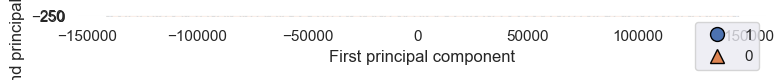

In [289]:
# plotting the first vs. second principal component, colored by target class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca_heart[:, 0], X_pca_heart[:, 1], heart_y_train)
plt.legend(heart_y_train.unique(), loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [291]:
X_pca_heart

array([[ 1.15924750e+05,  1.35363367e+02],
       [-7.47252455e+04, -5.17223073e+01],
       [ 8.61667576e+04, -3.74600880e+02],
       ...,
       [-8.69602517e+04,  3.69797228e+02],
       [-1.37331246e+05, -1.61826738e+02],
       [-1.35756252e+05,  3.61400876e+02]])

## Feature Scaling

In [292]:
min_max_scalar = preprocessing.MinMaxScaler()
heart_train_scaled = min_max_scalar.fit_transform(heart_X_train.drop(columns=['Is Male', 
                                                                'Is Female', 
                                                                'Country', 
                                                                'Continent', 
                                                                'Hemisphere']))
heart_train_df_scaled = pd.DataFrame(heart_train_scaled)
heart_train_df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.319444,0.907143,0.614286,0.0,0.0,1.0,1.0,0.0,0.927711,1.0,...,1.0,0.666667,0.831996,0.906885,0.134382,0.332468,0.285714,0.333333,0.300000,0.76
1,0.125000,0.032143,0.157143,1.0,1.0,0.0,1.0,0.0,0.811014,1.0,...,1.0,0.444444,0.749220,0.225539,0.551374,0.570130,0.000000,0.666667,0.122222,0.92
2,0.652778,0.614286,0.500000,1.0,0.0,1.0,0.0,1.0,0.309620,0.5,...,1.0,0.555556,0.359690,0.800535,0.219803,0.993506,0.857143,0.000000,0.688889,0.76
3,0.791667,0.342857,0.585714,0.0,1.0,1.0,1.0,1.0,0.674865,1.0,...,1.0,0.666667,0.216049,0.801997,0.245444,0.518182,0.142857,0.166667,0.611111,0.38
4,0.000000,0.182143,0.571429,1.0,0.0,1.0,0.0,1.0,0.485842,1.0,...,1.0,0.111111,0.193743,0.972092,0.627874,0.248052,0.285714,0.333333,0.422222,0.32


In [293]:
heart_train_df_scaled[['Is Male', 
                        'Is Female', 
                        'Country', 
                        'Continent', 
                        'Hemisphere']] = heart_X_train[['Is Male', 
                                            'Is Female', 
                                            'Country', 
                                            'Continent', 
                                            'Hemisphere']]